In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import ElasticNet

In [149]:
# реализуем задание 1: загрузка и предварительная обработка данных
# Загрузка данных
data = pd.read_csv('telcom_customer_churn.csv')
data.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0          0.0          0.0        0.0     -157.25  ...       0.0       N   
1          9.1          0.0        0.0      532.25  ...       0.0       Z   
2          0.0          0.0        0.0       -4.25  ...       0.0       N   
3          0.0          0.0        0.0       -1.50  ...       0.0       U   
4          0.0          0.0        0.0       38.50  ...       0.0       I   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  
0       U       U        U         U         U         Y    361.0      1000001  
1       U       U        U         U         U         Y    240.0      1000002  
2       U       Y        U         U         U         Y   1504.0      1000003  
3       Y       U        U         U         U         Y   1812.0      1000004  
4       U       U        U         U         U         Y    434.0      1000005  

[5 rows x 100 columns]

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [153]:
# анализируем наличие пропущенных значений и выполняем их обработку 
# в столбцах с числовыми признаками меняем пропущенные значения на средние
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [155]:
# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          100000 non-null  float64
 1   mou_Mean          100000 non-null  float64
 2   totmrc_Mean       100000 non-null  float64
 3   da_Mean           100000 non-null  float64
 4   ovrmou_Mean       100000 non-null  float64
 5   ovrrev_Mean       100000 non-null  float64
 6   vceovr_Mean       100000 non-null  float64
 7   datovr_Mean       100000 non-null  float64
 8   roam_Mean         100000 non-null  float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [157]:
# Заполнение NaN в столбцах c "категориальными данными"модой
for column in data.select_dtypes(include=['object']).columns:
    mode_value = data[column].mode()[0]  # Вычисляем моду
    data[column] = data[column].fillna(mode_value)  # Заполняем NaN модой

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          100000 non-null  float64
 1   mou_Mean          100000 non-null  float64
 2   totmrc_Mean       100000 non-null  float64
 3   da_Mean           100000 non-null  float64
 4   ovrmou_Mean       100000 non-null  float64
 5   ovrrev_Mean       100000 non-null  float64
 6   vceovr_Mean       100000 non-null  float64
 7   datovr_Mean       100000 non-null  float64
 8   roam_Mean         100000 non-null  float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [159]:
# Изучаем наличие повторяющихся строк, отсутствуют
print(data.duplicated().sum())

0


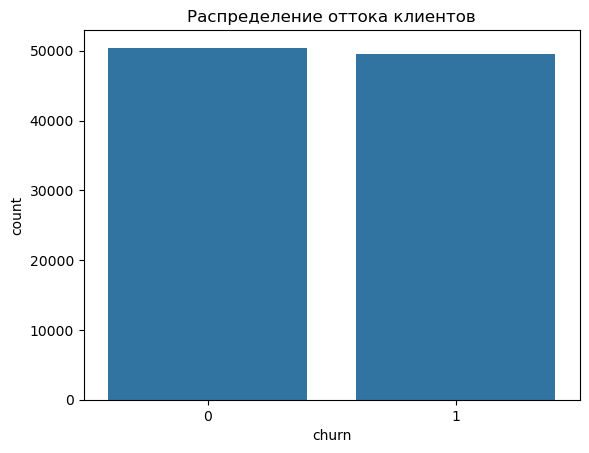

In [161]:
# Визуализация распределения целевой переменной
sns.countplot(x='churn', data=data)
plt.title('Распределение оттока клиентов')
plt.show()

In [163]:
data.churn.value_counts().sort_index() # изучение распределения значений в целевой переменной

churn
0    50438
1    49562
Name: count, dtype: int64

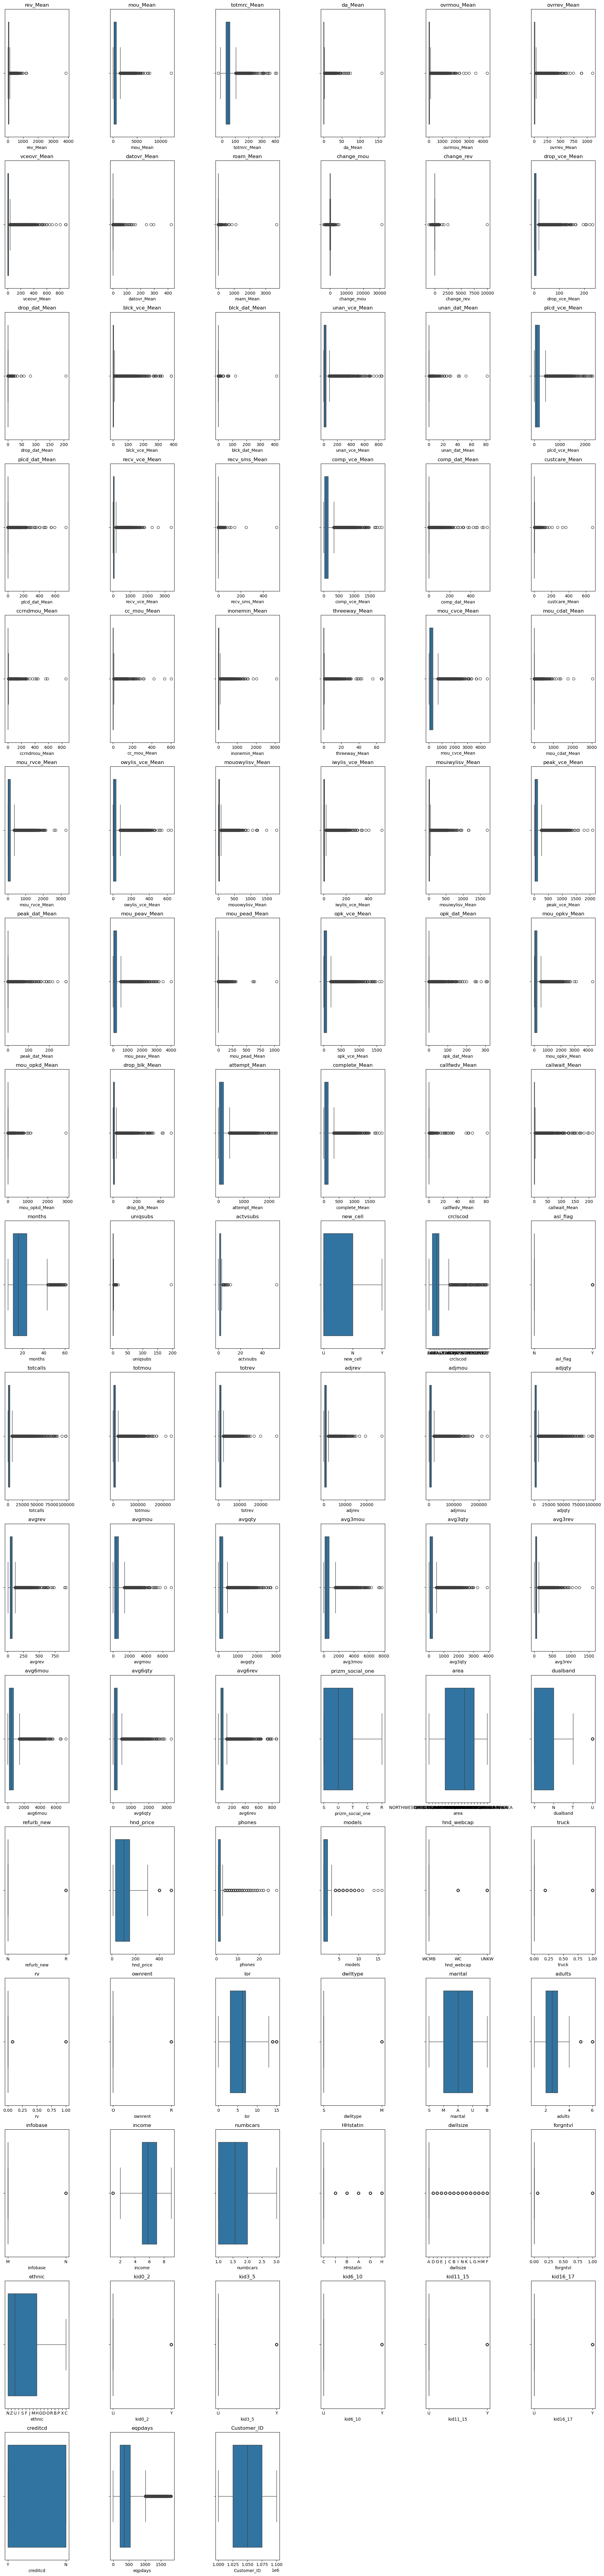

In [165]:
# серия боксплотов (boxplots) для всех столбцов датафрейма data, кроме столбца "churn"
num_columns = len(data.drop("churn", axis=1).columns)
nrows = int(np.ceil(num_columns / 6))  # Количество рядов, 6 подграфиков в ряд

plt.figure(figsize=(20, 5 * nrows))  # Высота изменяется в зависимости от количества рядов

for idx, column in enumerate(data.drop("churn", axis=1).columns):
    plt.subplot(nrows, 6, idx + 1)  # Используем индекс для задания позиции подграфика
    sns.boxplot(data=data, x=column)
    plt.title(column)

plt.tight_layout()  # Для лучшего оформления
plt.show()

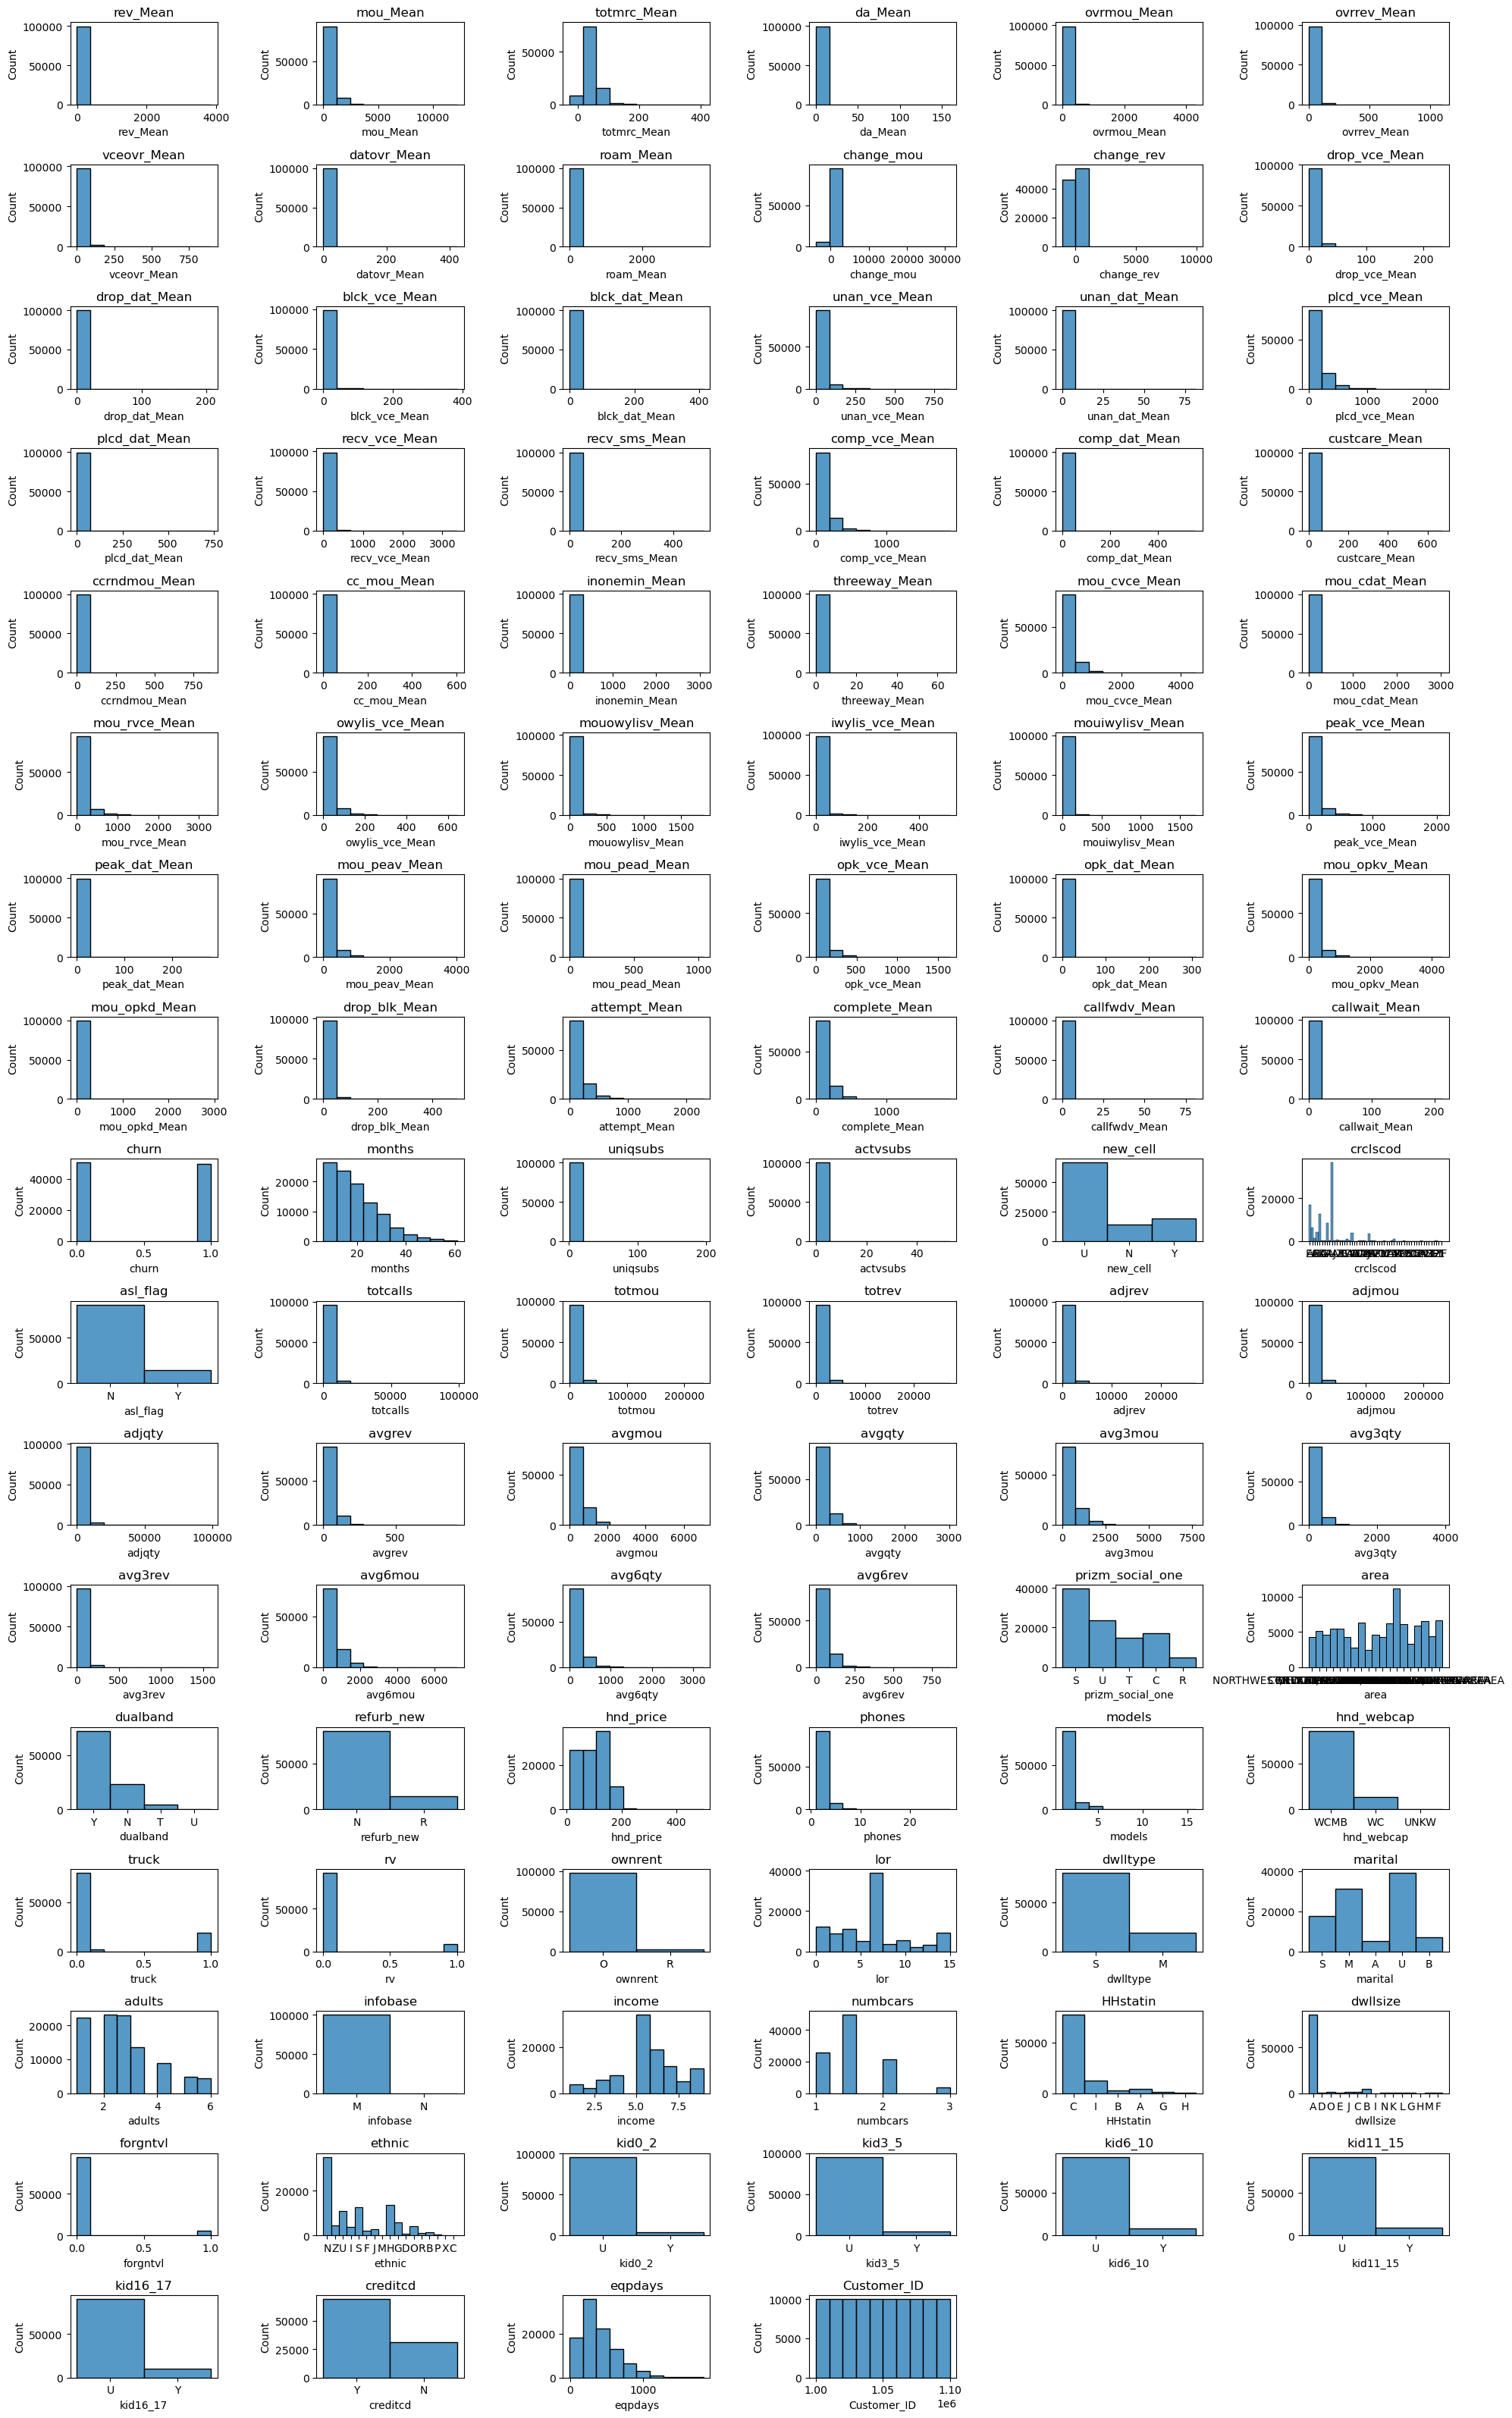

In [166]:
# строим гистограммы для всех столбцов датафрейма data
plt.figure(figsize=(20,32))

num_cols = len(data.columns)
rows = (num_cols // 6) + (num_cols % 6 > 0)  # Количество строк
for idx, column in enumerate(data.columns):
    plt.subplot(rows, 6, idx + 1)
    sns.histplot(data=data, x=column, bins=10)
    plt.title(column)
    
plt.tight_layout()  # Добавляет пространство между подграфиками
plt.show()

In [207]:
# Изучаем категориальные переменные
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Категориальные переменные:")
categorical_cols

Категориальные переменные:


Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [209]:
#изучаем количество уникальных значений и их частоту
for col in categorical_cols:
    print(f"\nСтолбец: {col}")
    print(data[col].value_counts())


Столбец: new_cell
new_cell
U    66914
Y    19301
N    13785
Name: count, dtype: int64

Столбец: crclscod
crclscod
AA    36509
A     16996
BA    12667
CA     8334
EA     6419
B      4110
DA     3669
ZA     3493
C      1456
A2      861
E4      833
U       480
E       339
D4      301
GA      281
Z4      253
D       247
I       243
G       241
JF      194
Z       191
J       190
CY      190
C2      180
M       169
ZY      119
D5      114
B2      109
K       106
W        97
C5       81
V1       70
U1       66
EM       57
Z5       56
Y        54
EC       48
GY       34
O        25
CC       25
E2       21
IF       14
Z1       12
H         9
L         6
P1        6
D2        5
TP        5
Z2        5
EF        4
A3        3
S         1
V         1
ZF        1
Name: count, dtype: int64

Столбец: asl_flag
asl_flag
N    86064
Y    13936
Name: count, dtype: int64

Столбец: prizm_social_one
prizm_social_one
S    39485
U    23613
C    17018
T    14989
R     4895
Name: count, dtype: int64

Столбец: 

In [169]:
# Применяем One-Hot Encoding ко всем категориальным переменным
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded.head()
# получается, что булевские значения в столбцах ethnic_Z	kid0_2_ и др. в датасете представлены типом  "object"
# колебалась, не переформатировать их в int со значениями 1 и 0. Решила оставить как есть 

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  ethnic_S  ethnic_U  \
0          0.0          0.0        0.0     -157.25  ...     False     False   
1          9.1          0.0        0.0      532.25  ...     False     False   
2          0.0          0.0        0.0       -4.25  ...     False     False   
3          0.0          0.0        0.0       -1.50  ...     False      True   
4          0.0          0.0        0.0       38.50  ...     False     False   

   ethnic_X  ethnic_Z  kid0_2_Y  kid3_5_Y  kid6_10_Y  kid11_15_Y  kid16_17_Y  \
0     False     False     False     False      False       False       False   
1     False      True     False     False      False       False       False   
2     False     False     False      True      False       False       False   
3     False     False      True     False      False       False       False   
4     False     False     False     False      False       False       False   

   creditcd_Y  
0        True  
1        True  
2        True  
3        True  
4        True  

[5 rows x 211 columns]

In [170]:
print(data.dtypes)

rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15        object
kid16_17        object
creditcd        object
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object


In [177]:
bool_columns = data.select_dtypes(include=['bool']).columns.tolist()
print(bool_columns) # проверка

[]


In [179]:
data_encoded.shape

(100000, 211)

In [181]:
# выделяем количественные данные 
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [183]:
# создаем DataFrame для количественных признаков
df_quantitative = data[quantitative_columns]
print("Количественных признаки:")
df_quantitative.describe()

Количественных признаки:


rev_Mean       mou_Mean    totmrc_Mean        da_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       58.719985     513.559937      46.179136       0.888828   
std        46.208972     524.229868      23.581283       2.173729   
min        -6.167500       0.000000     -26.915000       0.000000   
25%        33.311875     151.500000      30.000000       0.000000   
50%        48.377500     357.500000      44.990000       0.247500   
75%        70.630000     701.250000      59.990000       0.888828   
max      3843.262500   12206.750000     409.990000     159.390000   

         ovrmou_Mean    ovrrev_Mean    vceovr_Mean    datovr_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       41.072247      13.559560      13.295062       0.261318   
std        97.122320      30.446392      30.002391       3.120946   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         3.000000       1.050000       0.700000       0.000000   
75%        42.000000      14.350000      13.950000       0.000000   
max      4320.750000    1102.400000     896.087500     423.540000   

           roam_Mean     change_mou  ...         models          truck  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean        1.286405     -13.933818  ...       1.545825       0.188820   
std        14.685090     274.854774  ...       0.898391       0.387964   
min         0.000000   -3875.000000  ...       1.000000       0.000000   
25%         0.000000     -86.000000  ...       1.000000       0.000000   
50%         0.000000      -7.000000  ...       1.000000       0.000000   
75%         0.257500      61.750000  ...       2.000000       0.000000   
max      3685.200000   31219.250000  ...      16.000000       1.000000   

                  rv            lor         adults         income  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.082580       6.177238       2.530326       5.783112   
std         0.272854       3.956420       1.274685       1.884277   
min         0.000000       0.000000       1.000000       1.000000   
25%         0.000000       3.000000       2.000000       5.000000   
50%         0.000000       6.177238       2.530326       5.783112   
75%         0.000000       7.000000       3.000000       7.000000   
max         1.000000      15.000000       6.000000       9.000000   

            numbcars       forgntvl        eqpdays   Customer_ID  
count  100000.000000  100000.000000  100000.000000  1.000000e+05  
mean        1.567563       0.057974     391.932309  1.050000e+06  
std         0.445057       0.231663     256.480910  2.886766e+04  
min         1.000000       0.000000      -5.000000  1.000001e+06  
25%         1.000000       0.000000     212.000000  1.025001e+06  
50%         1.567563       0.000000     342.000000  1.050000e+06  
75%         2.000000       0.000000     530.000000  1.075000e+06  
max         3.000000       1.000000    1823.000000  1.100000e+06  

[8 rows x 79 columns]

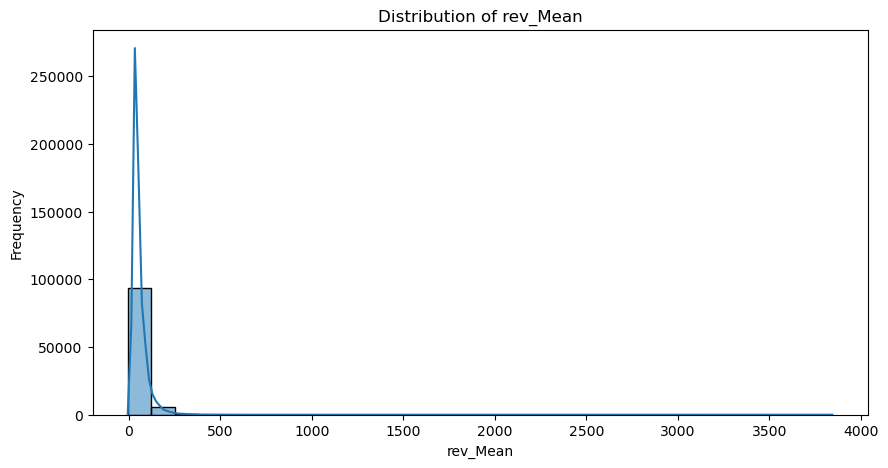

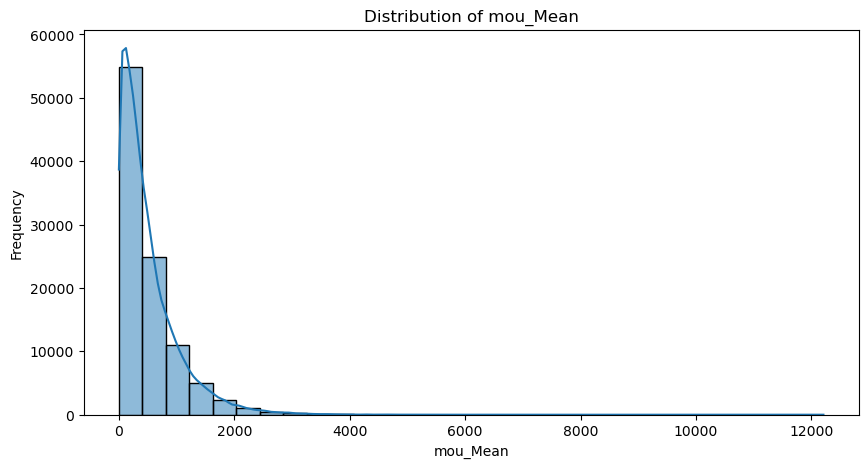

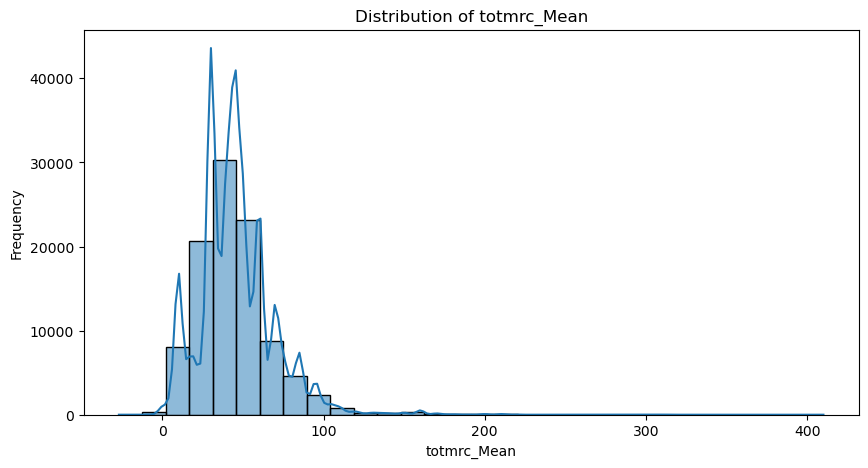

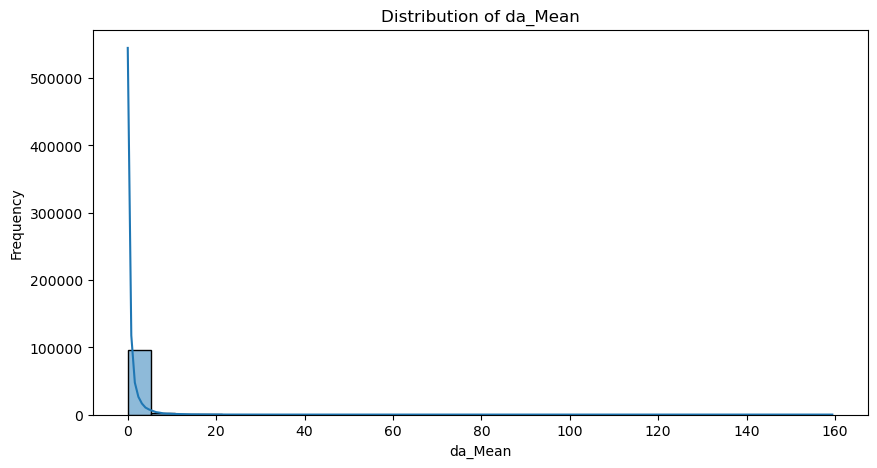

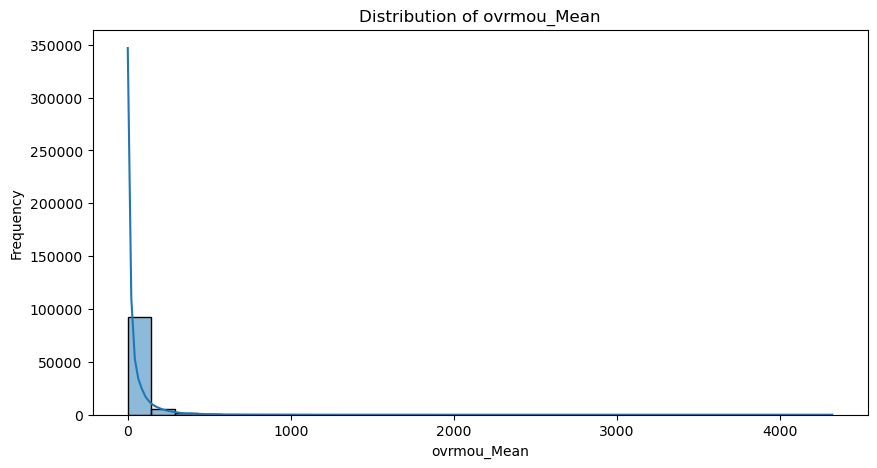

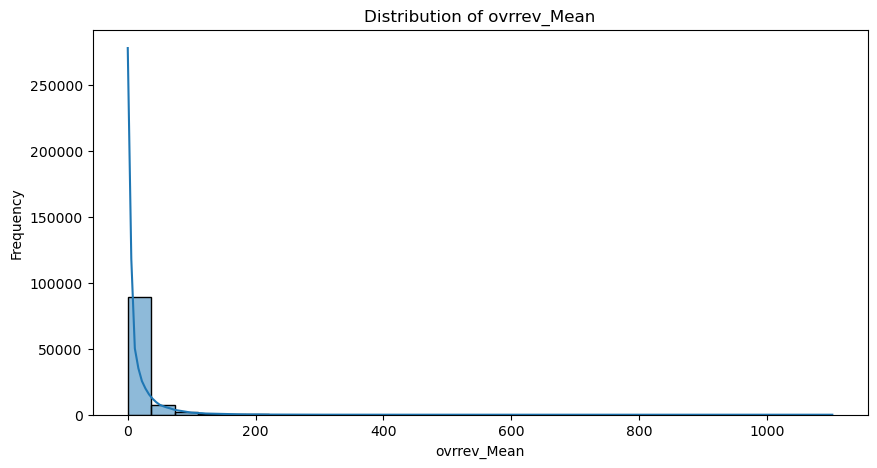

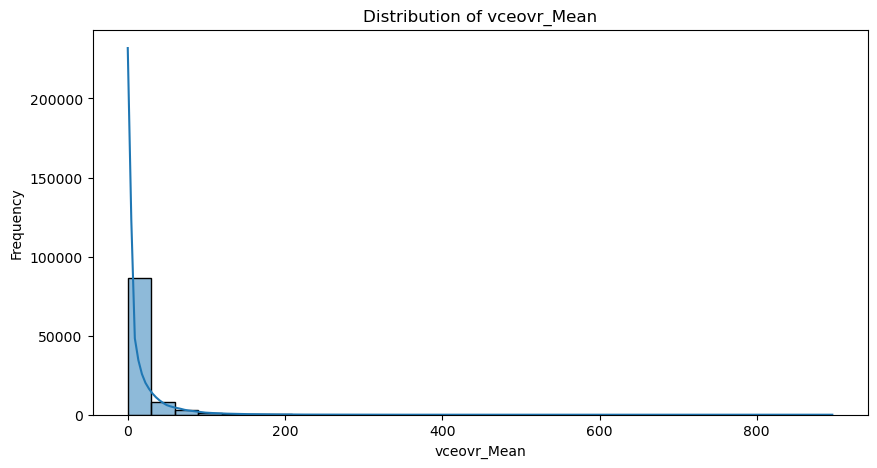

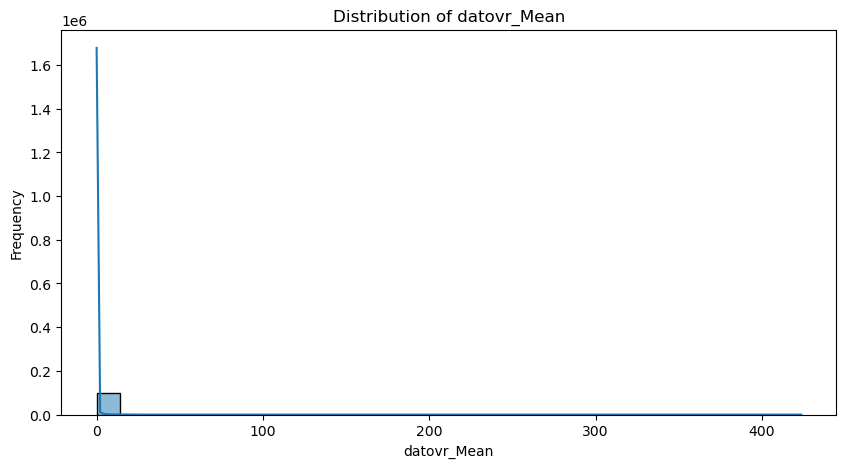

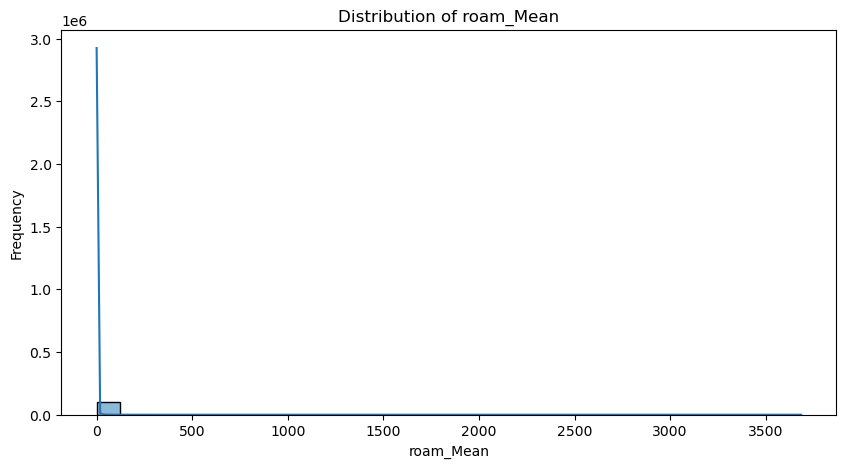

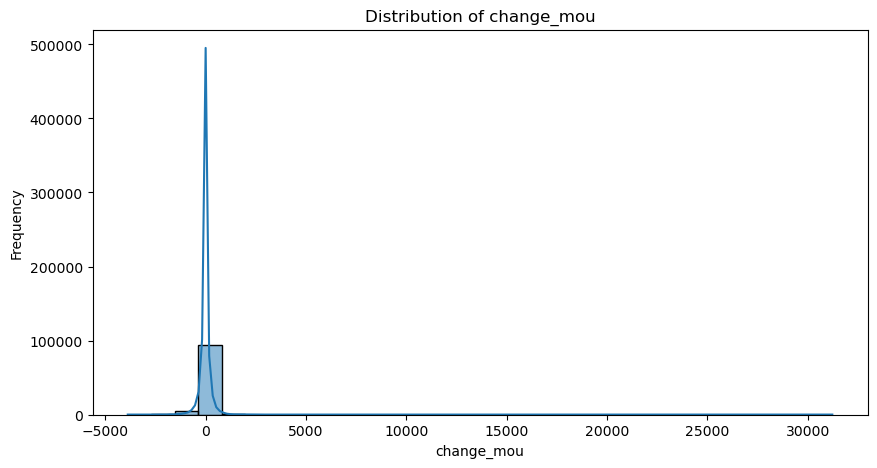

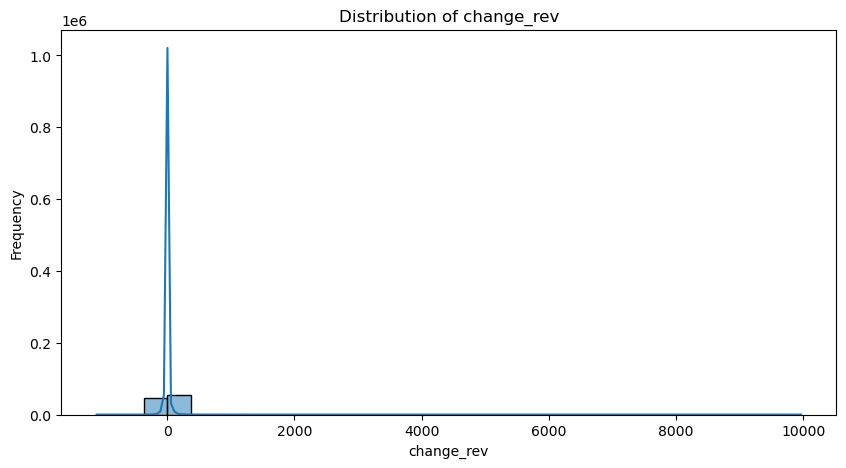

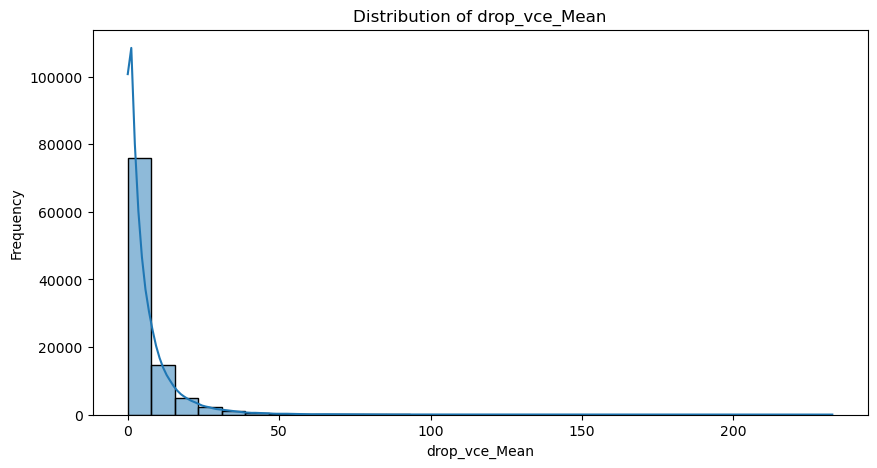

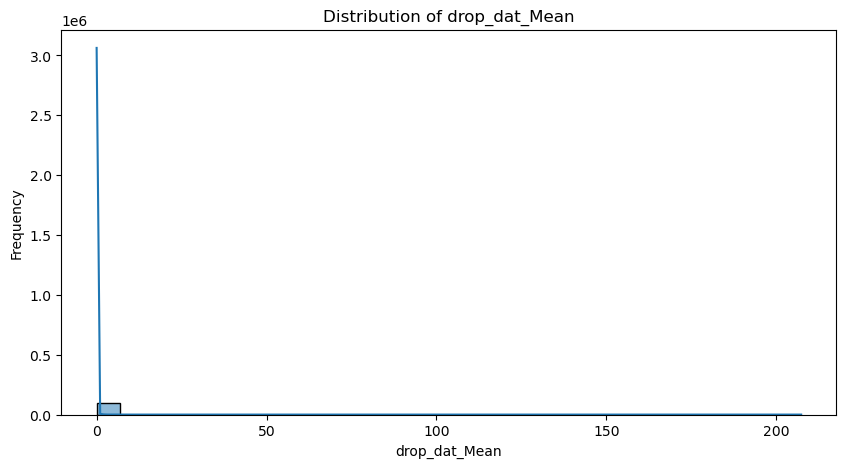

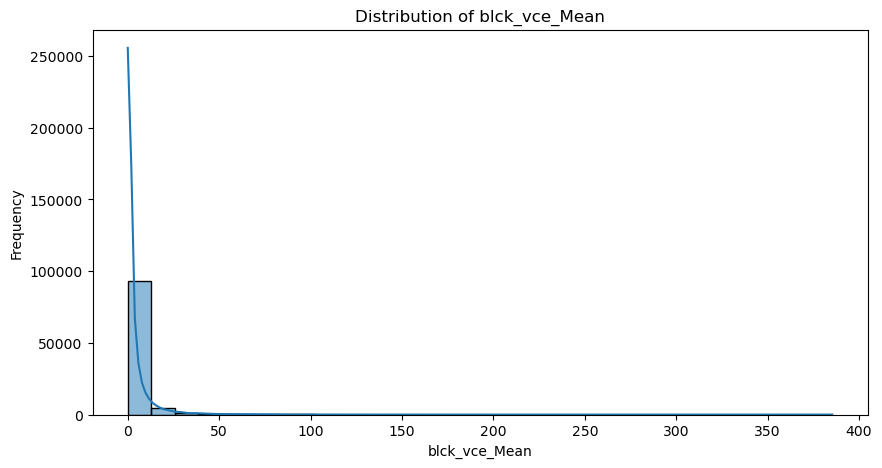

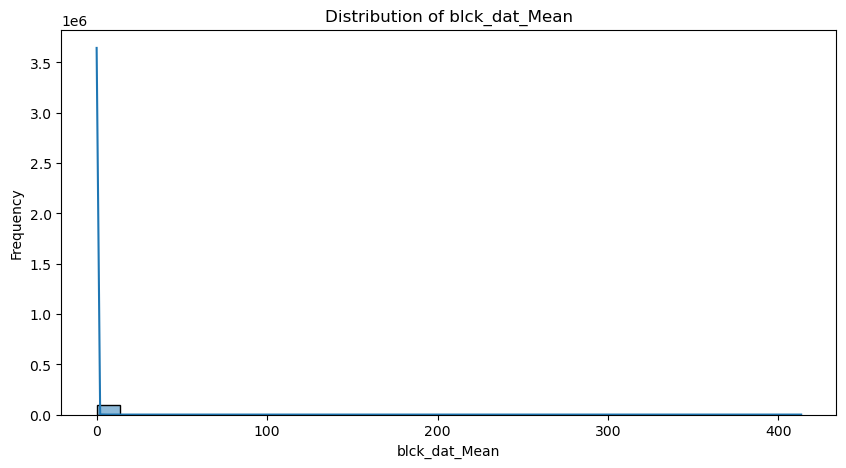

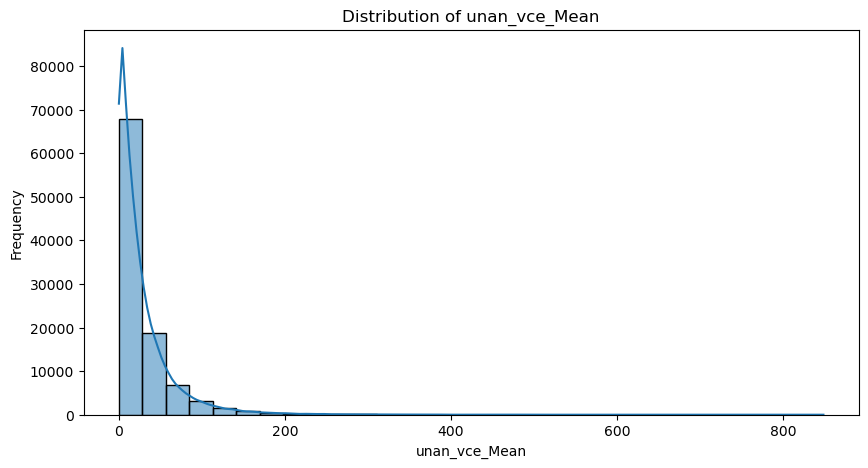

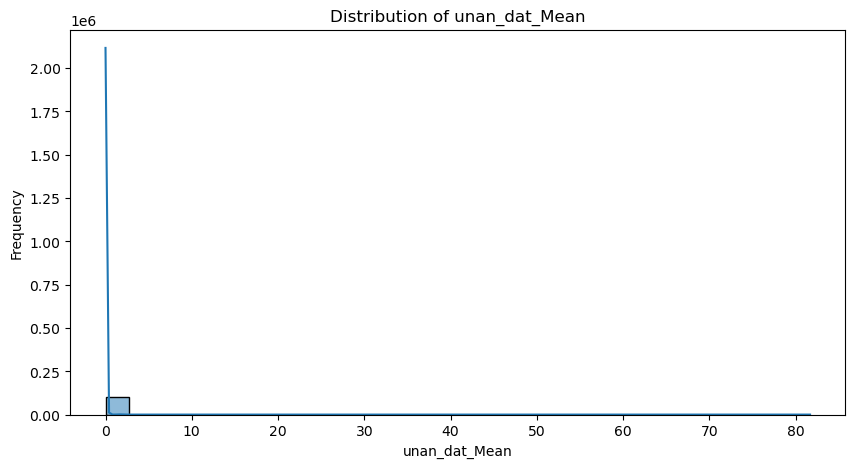

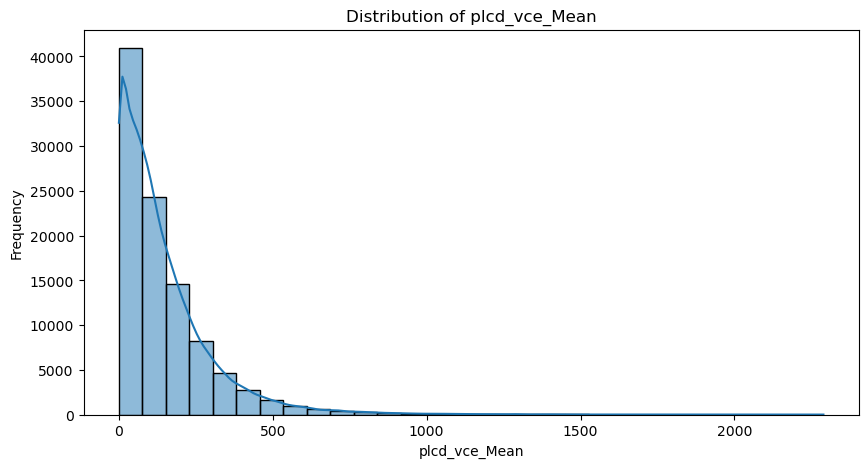

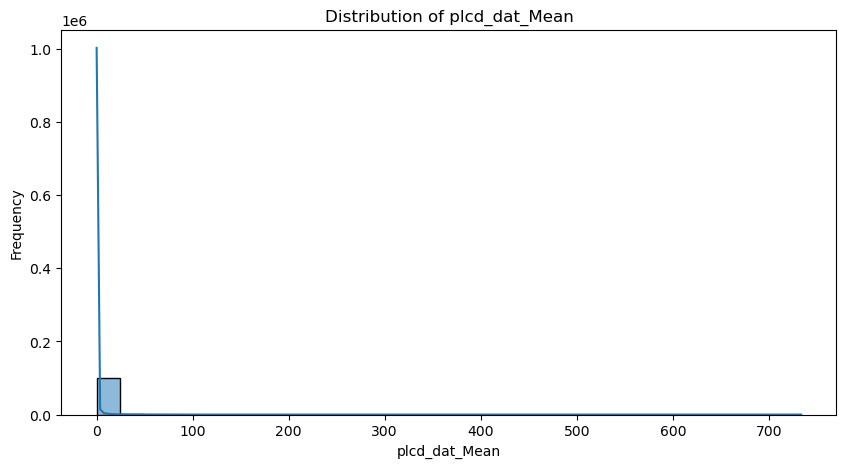

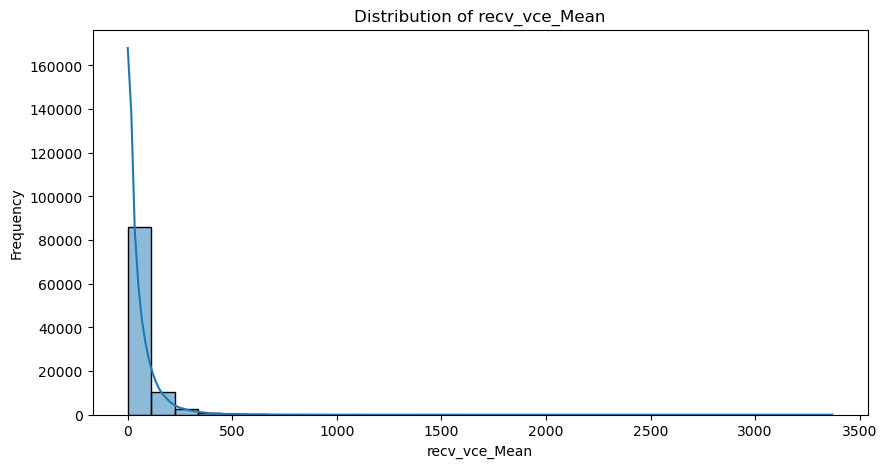

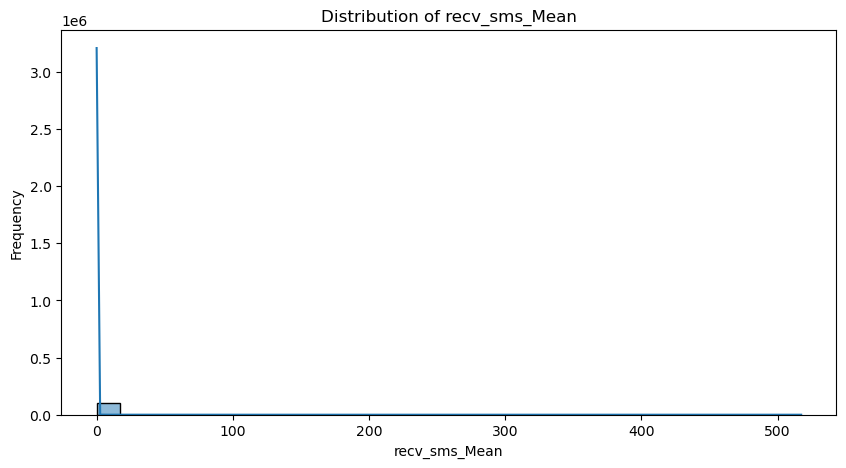

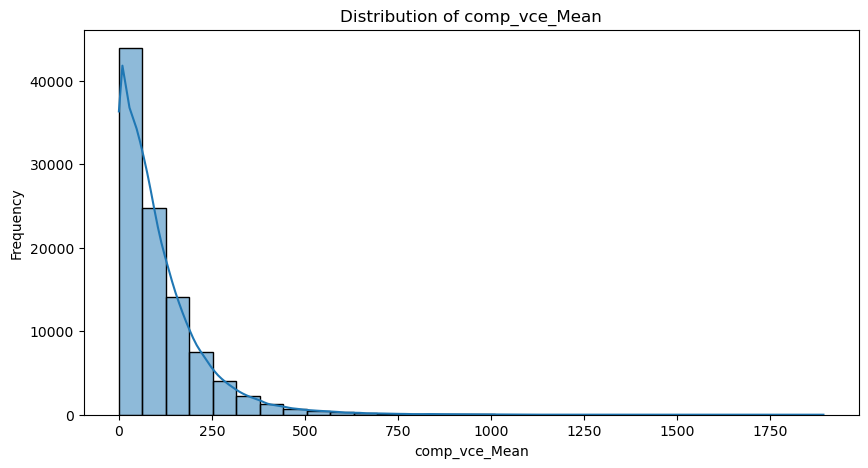

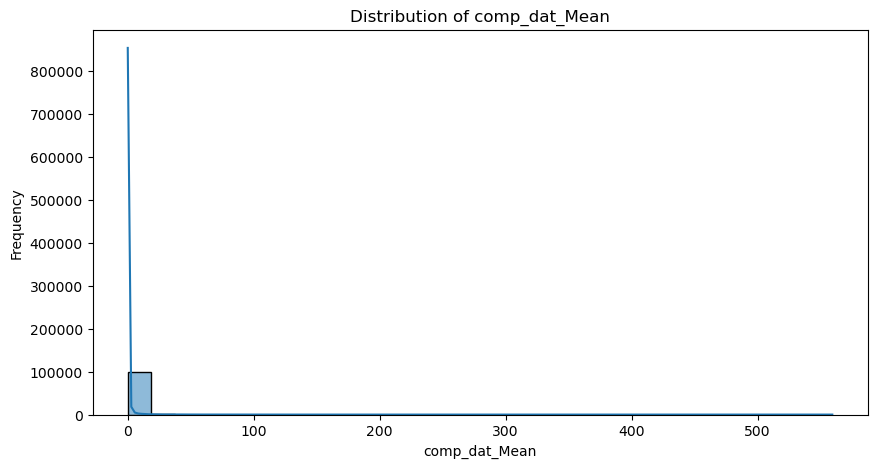

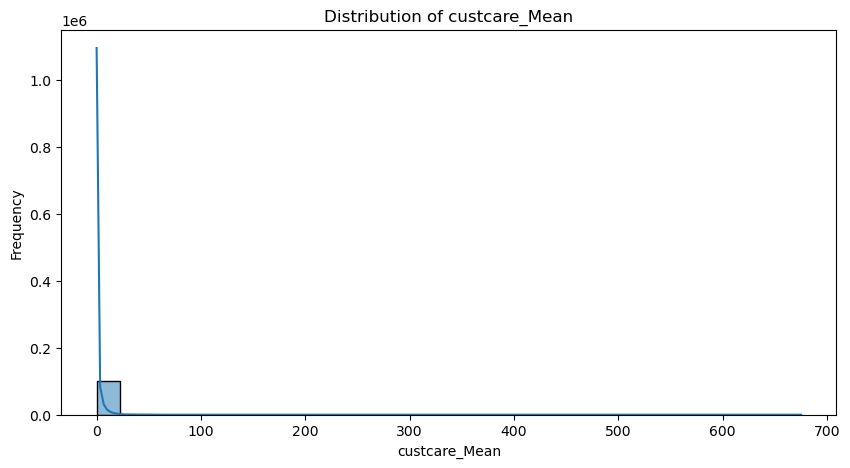

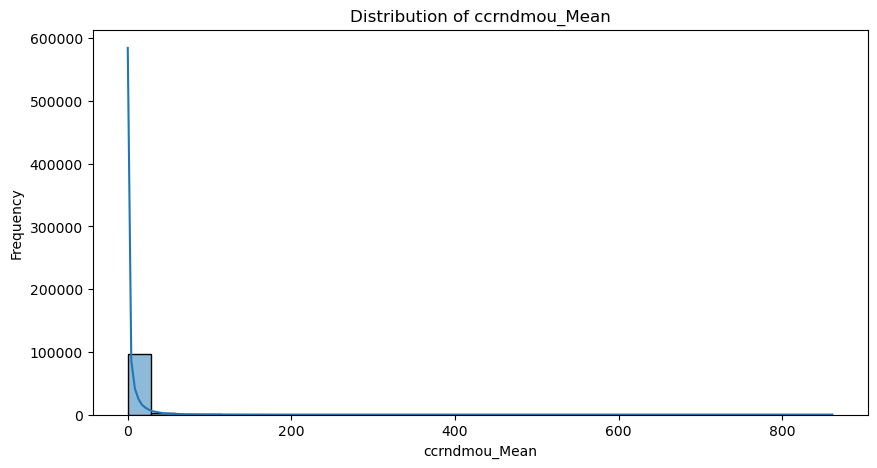

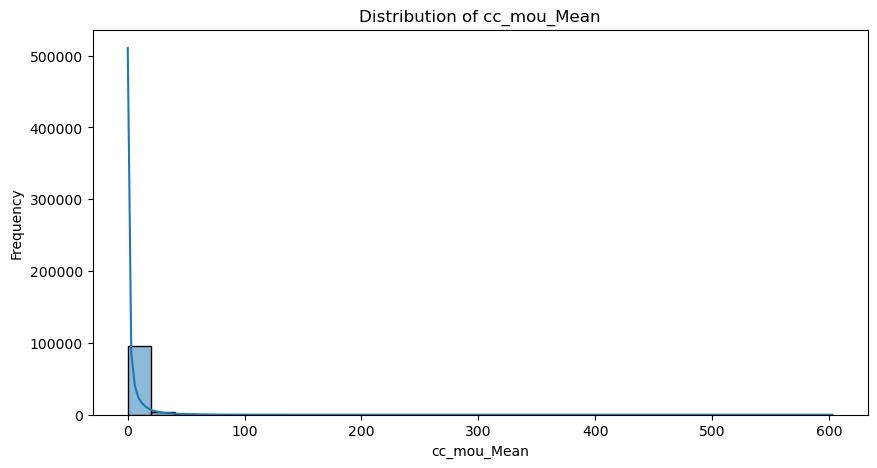

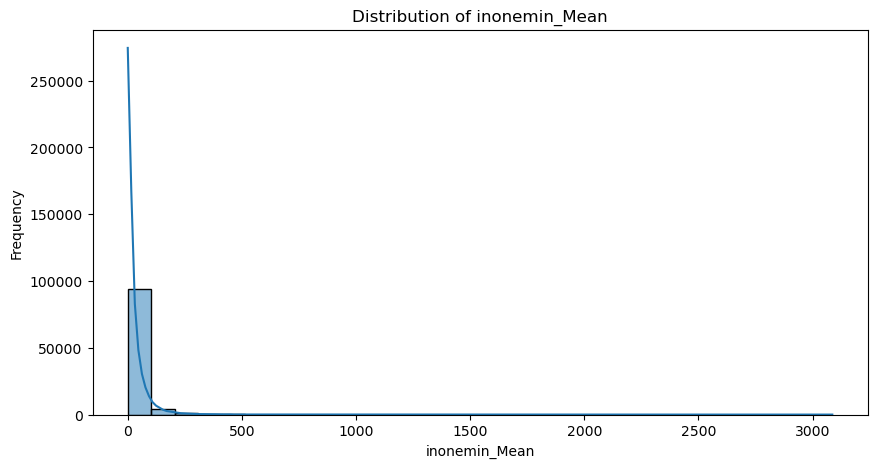

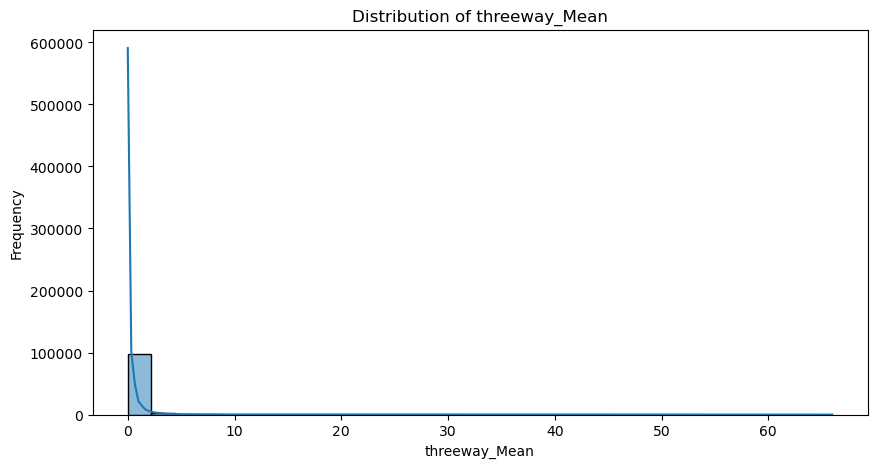

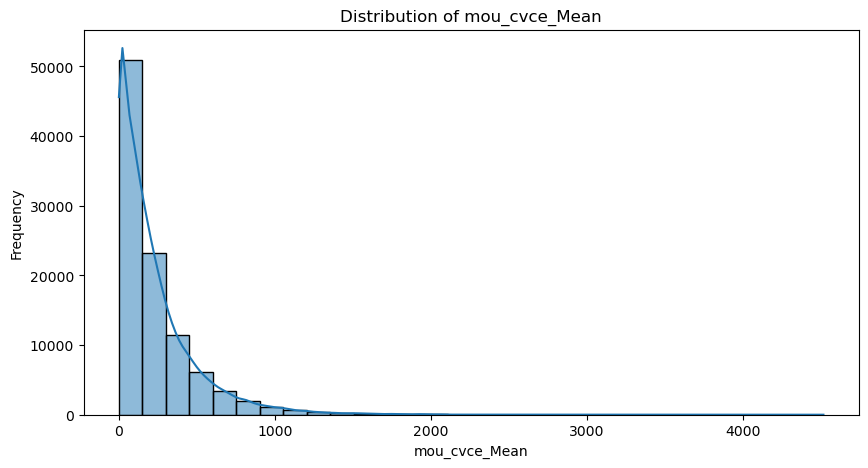

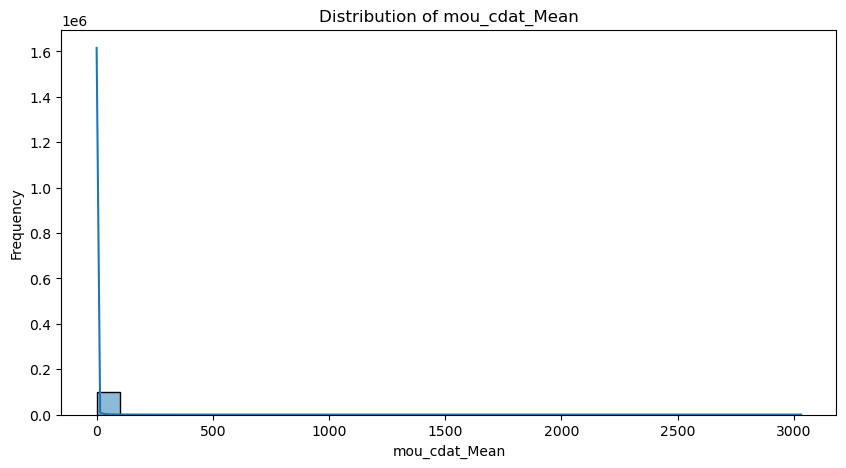

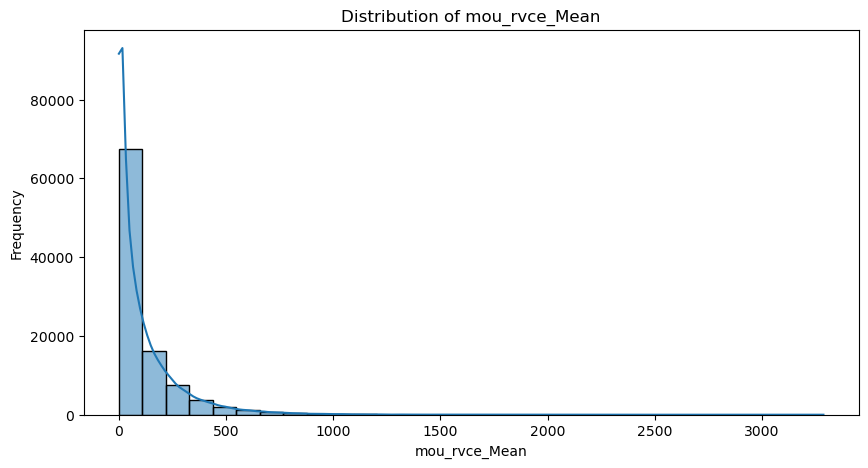

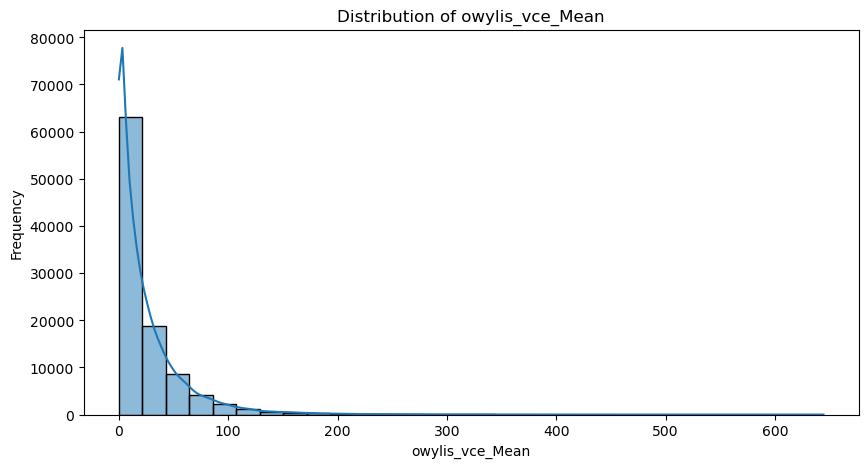

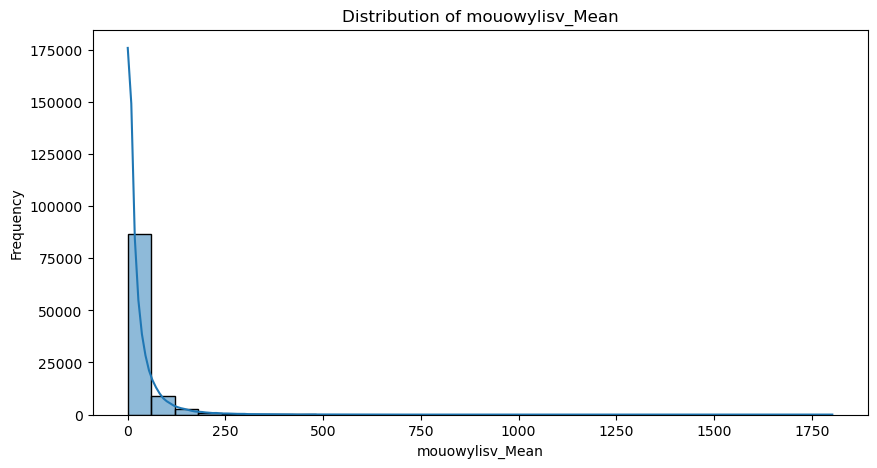

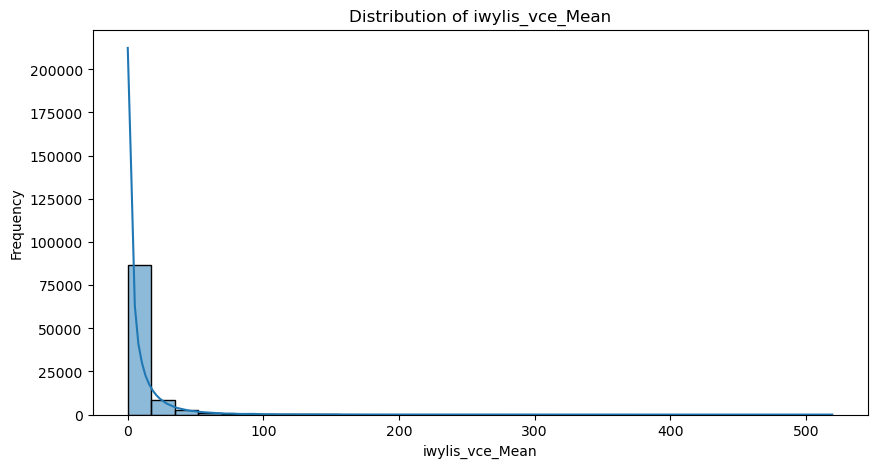

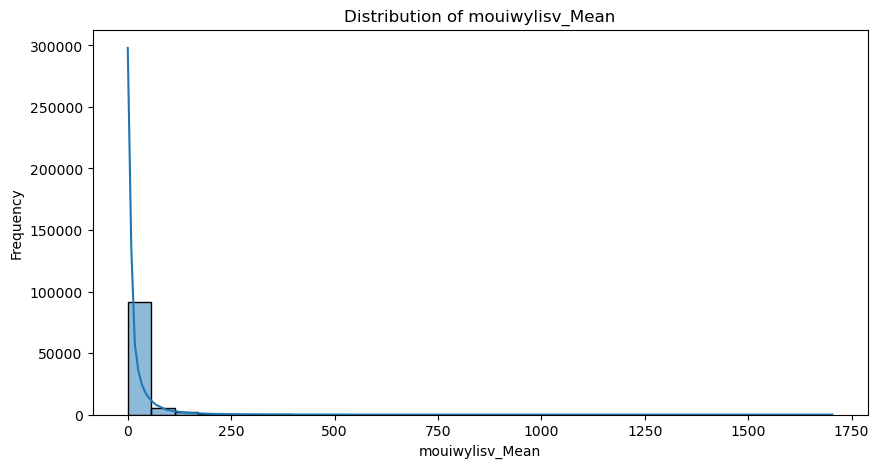

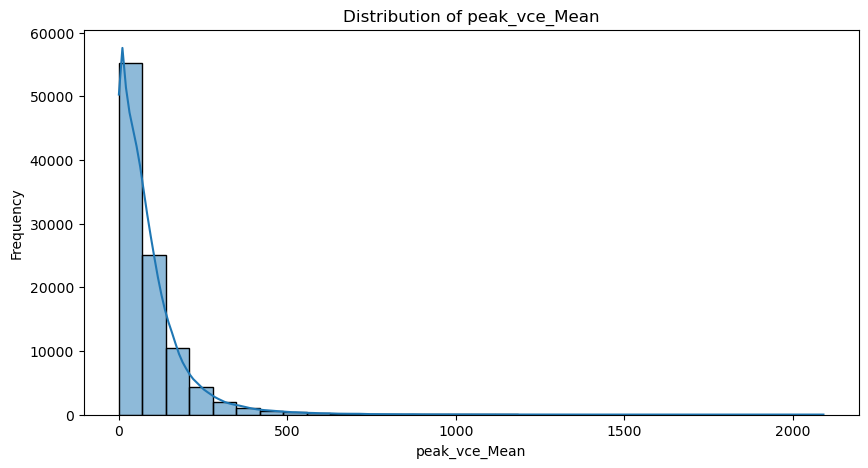

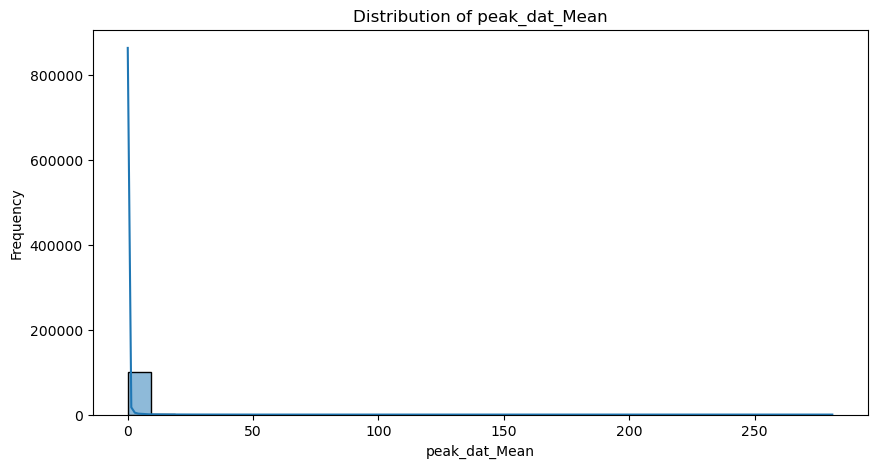

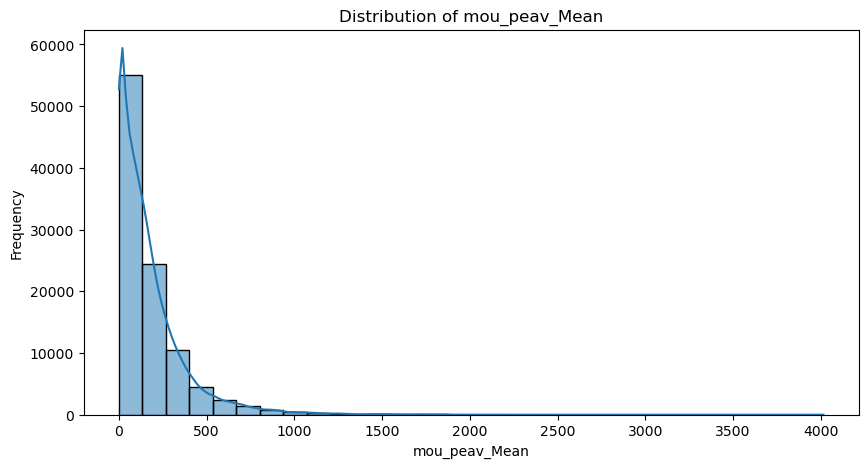

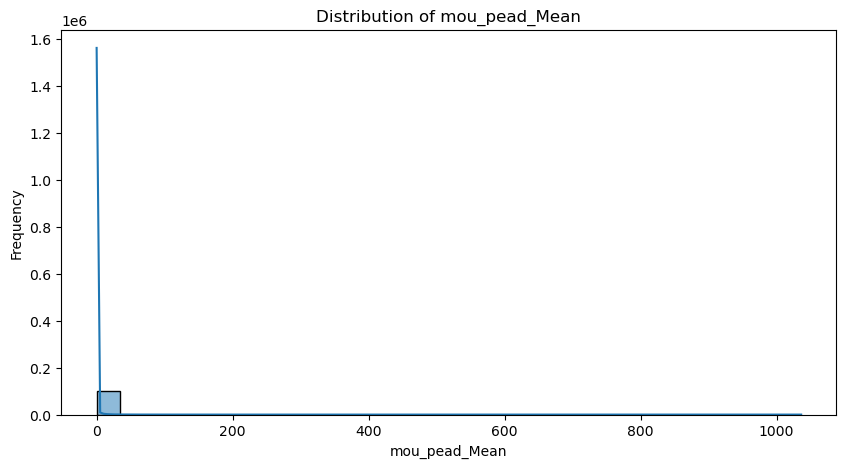

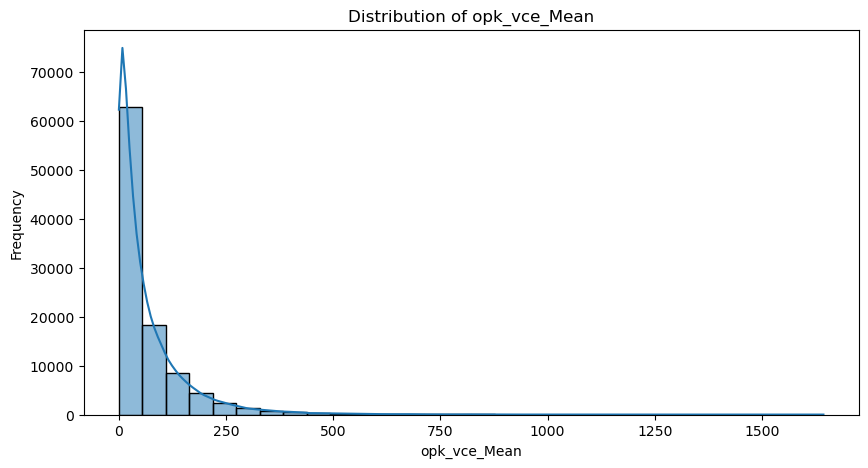

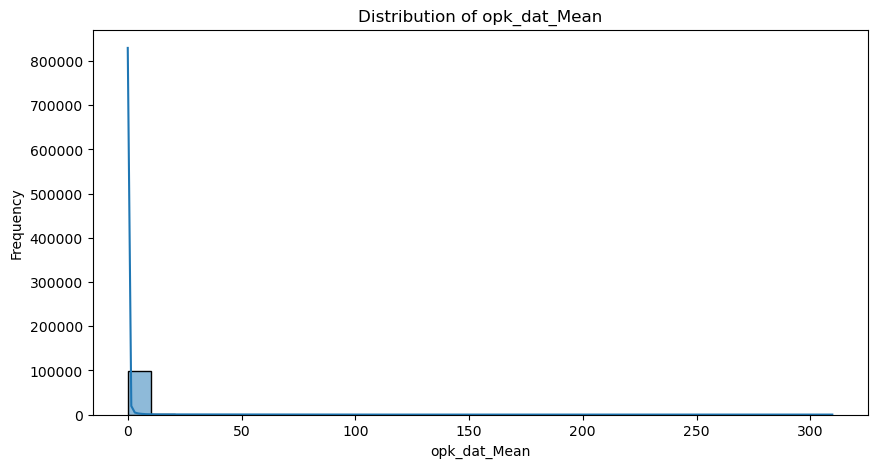

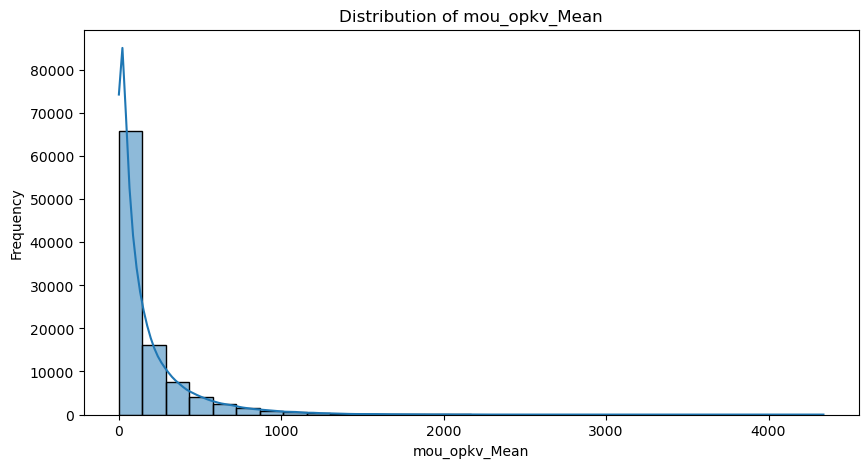

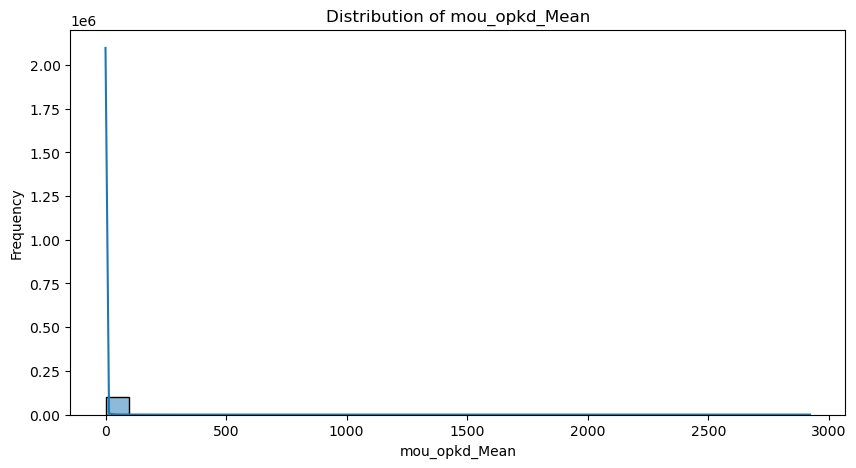

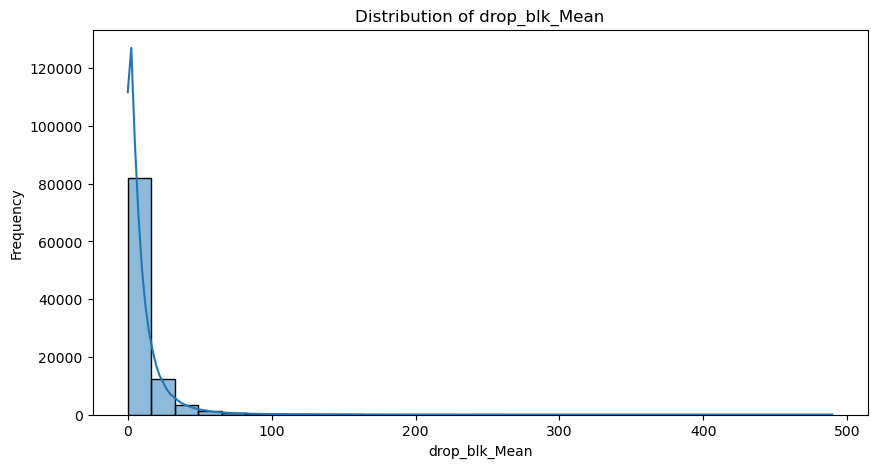

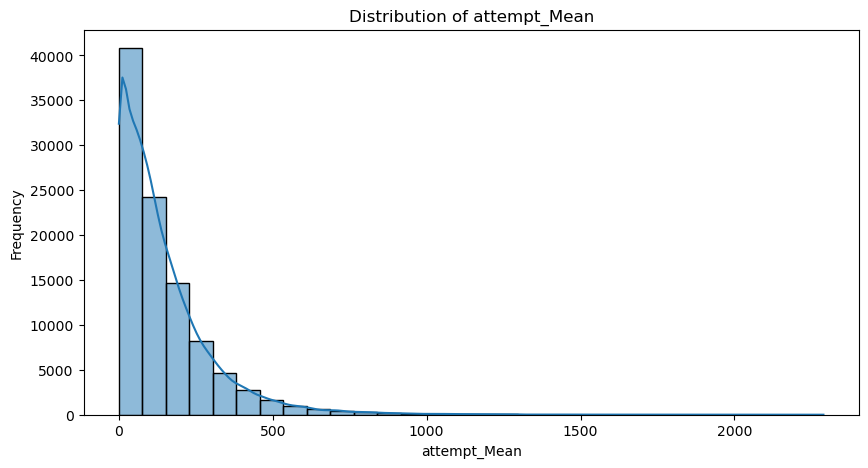

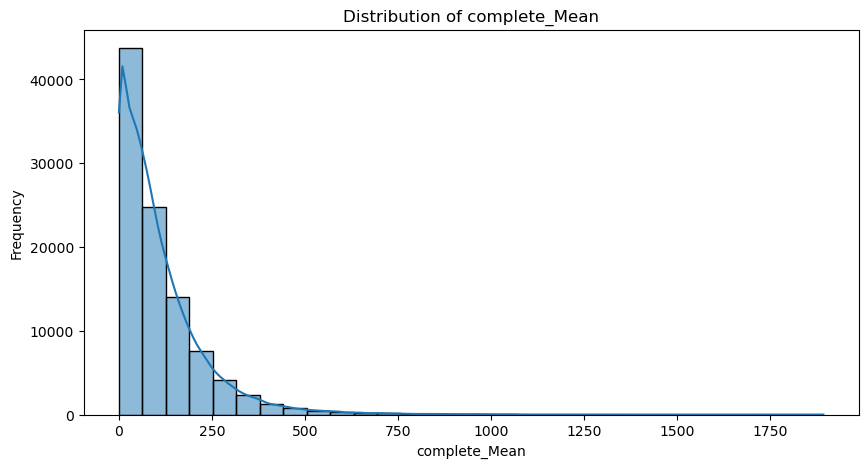

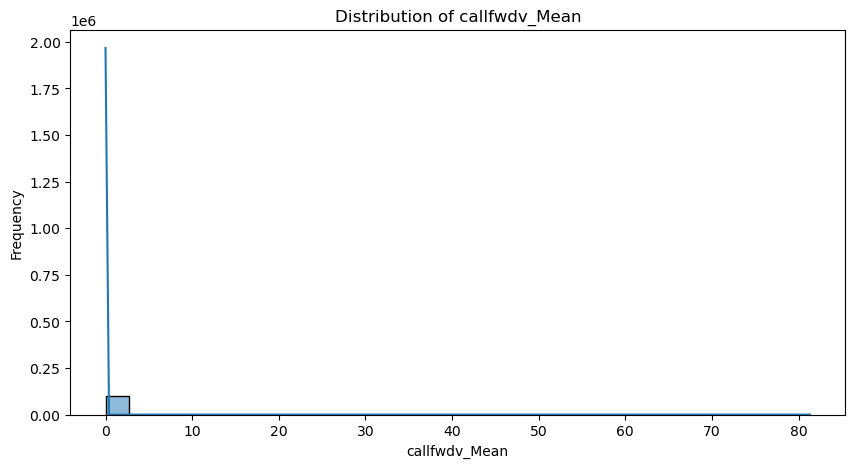

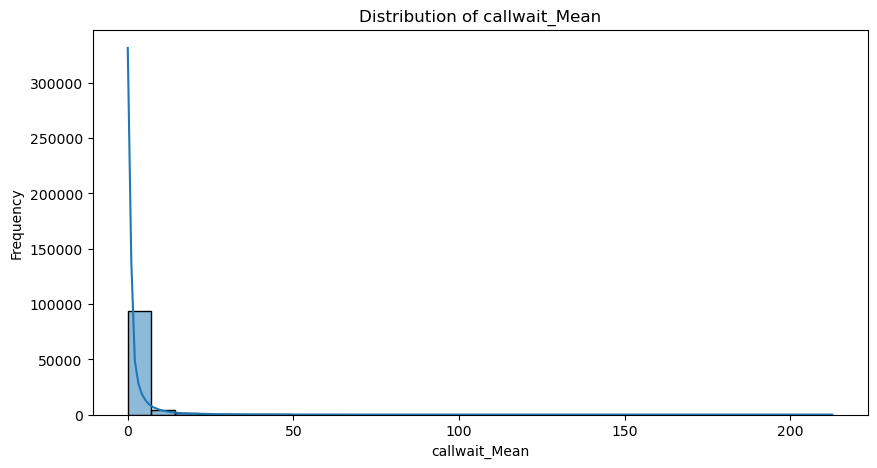

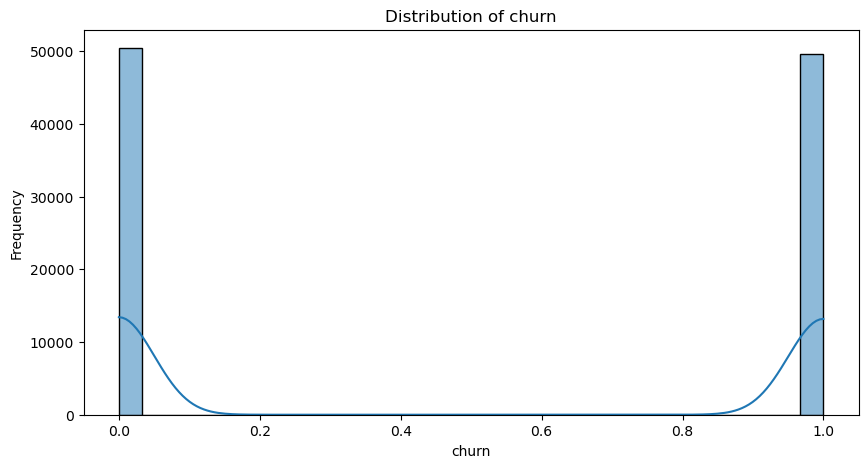

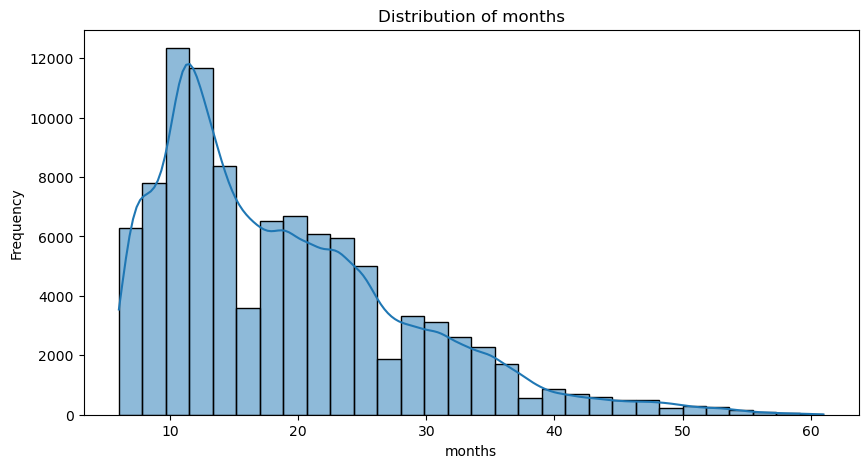

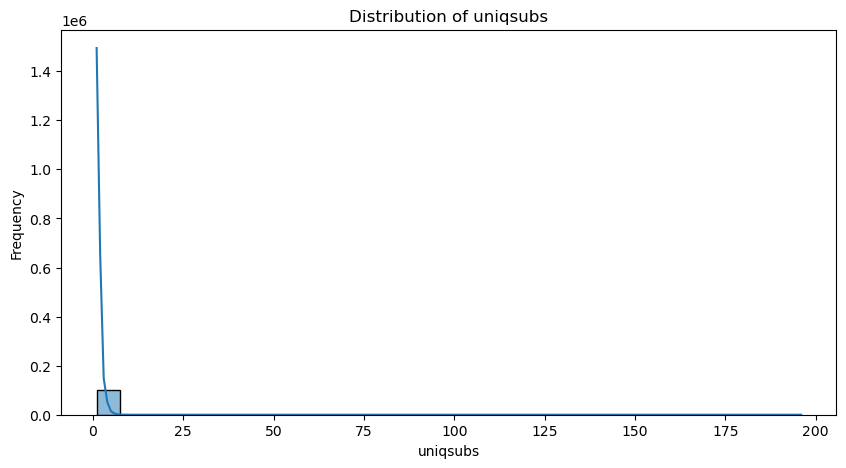

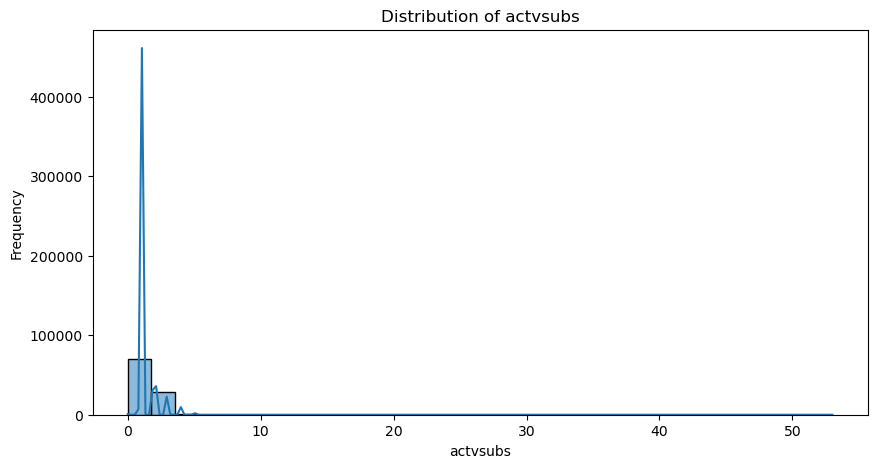

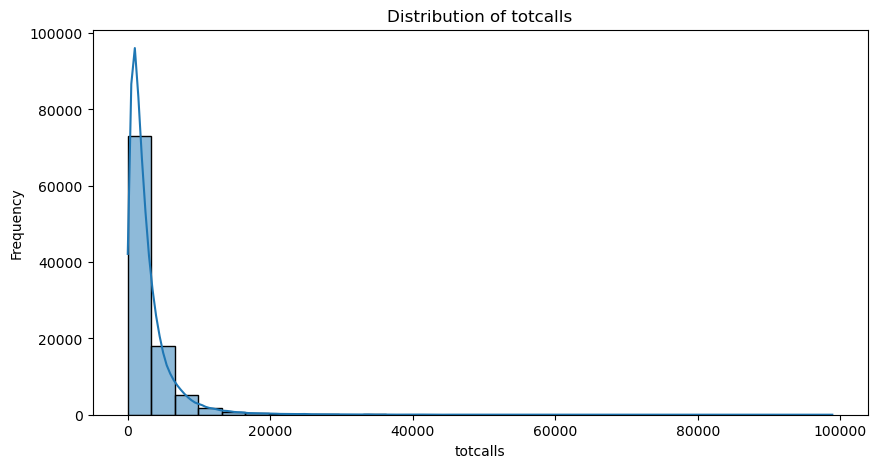

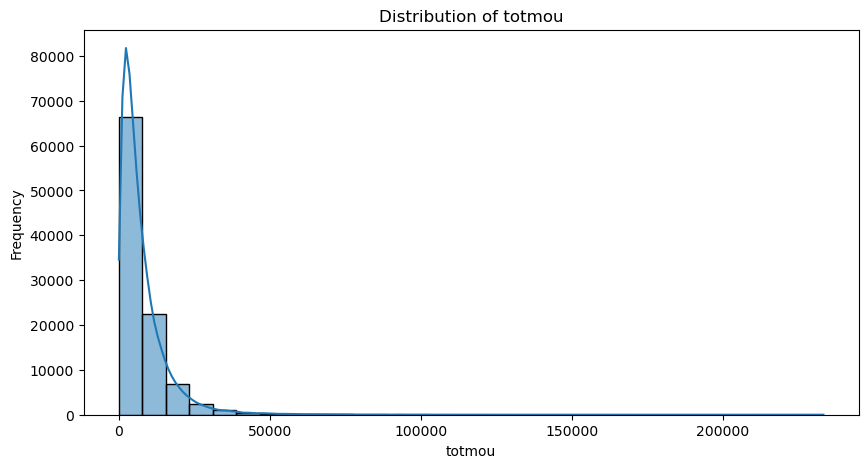

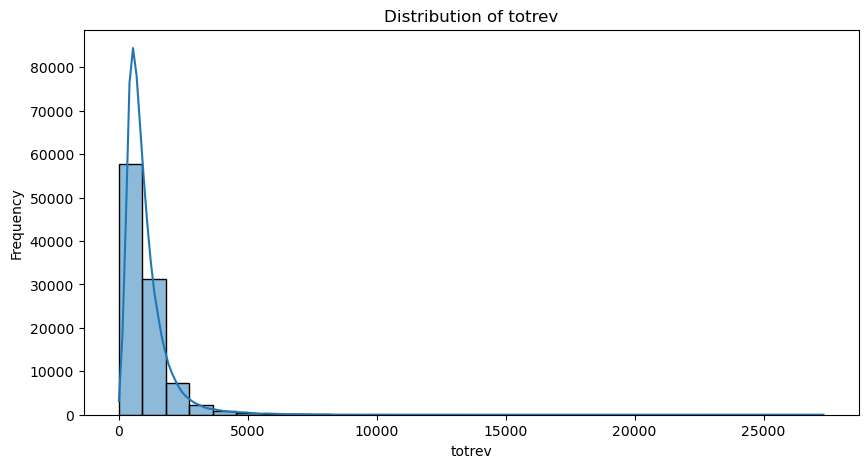

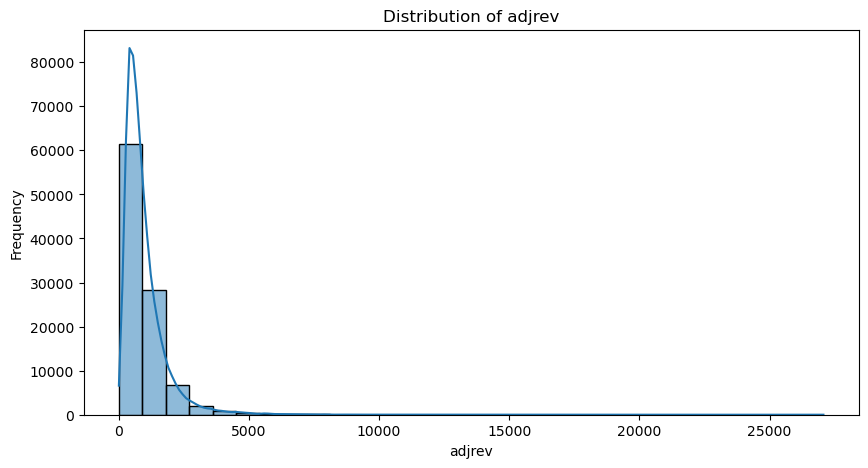

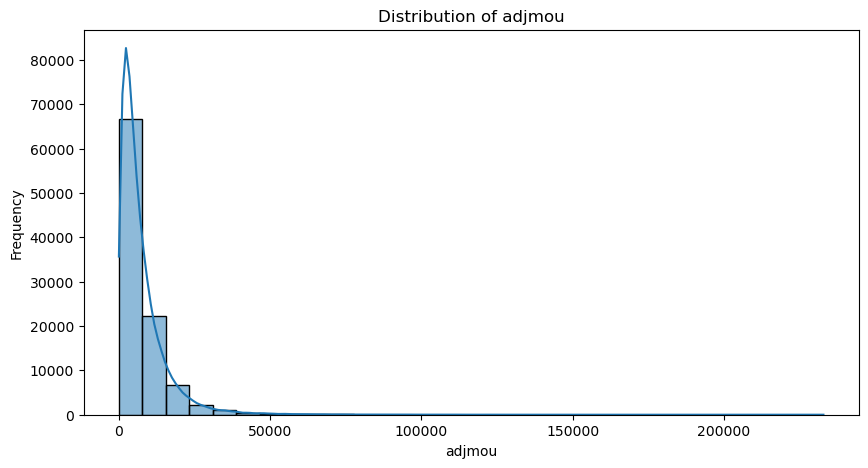

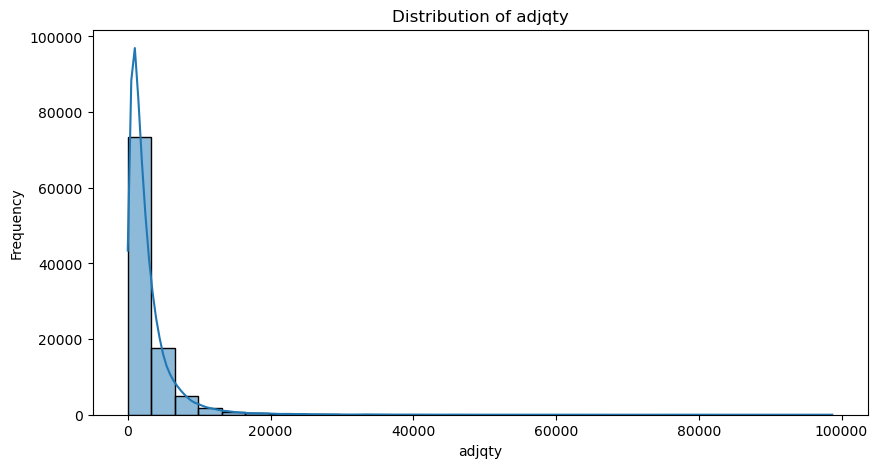

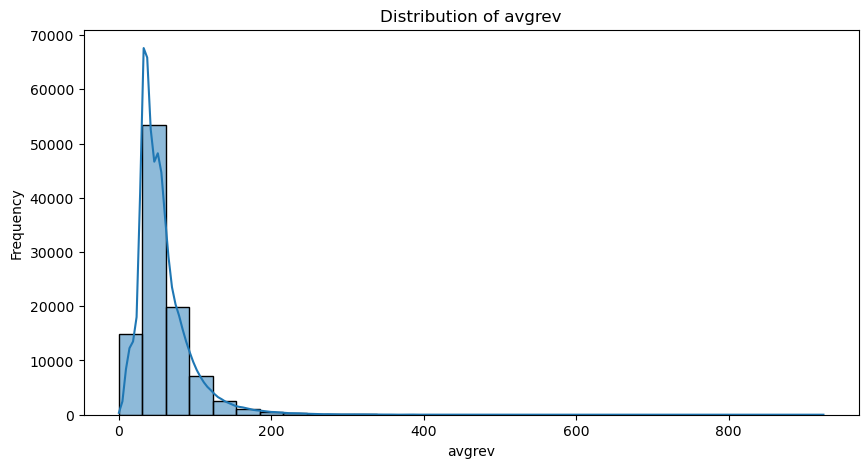

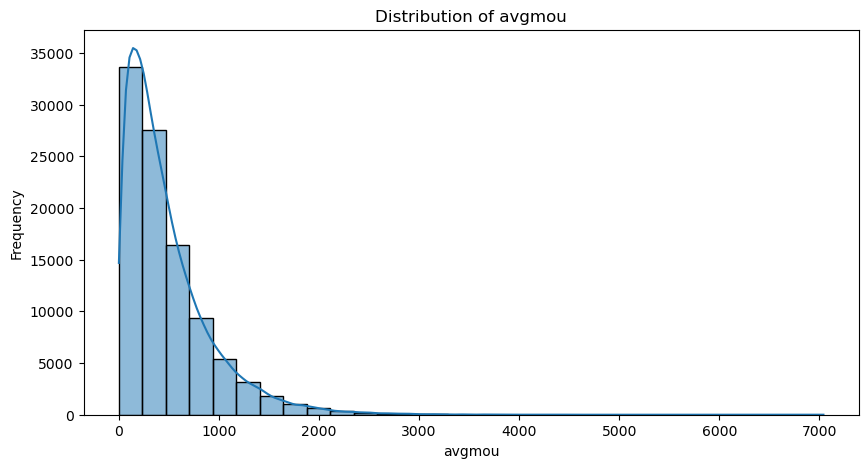

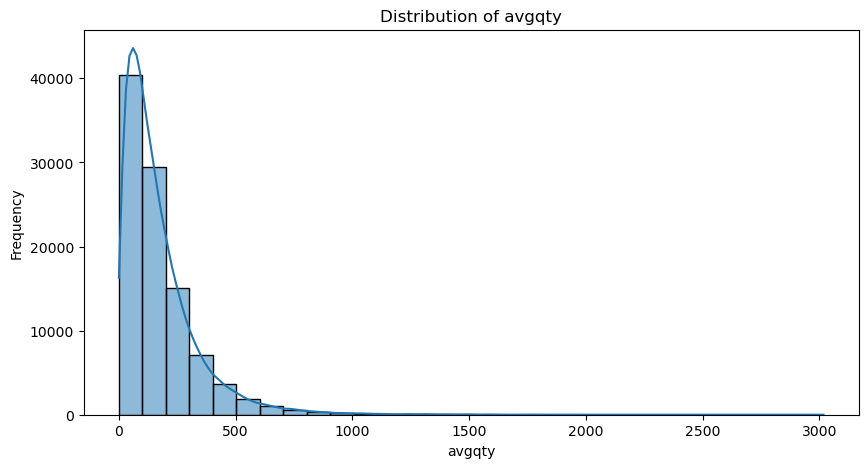

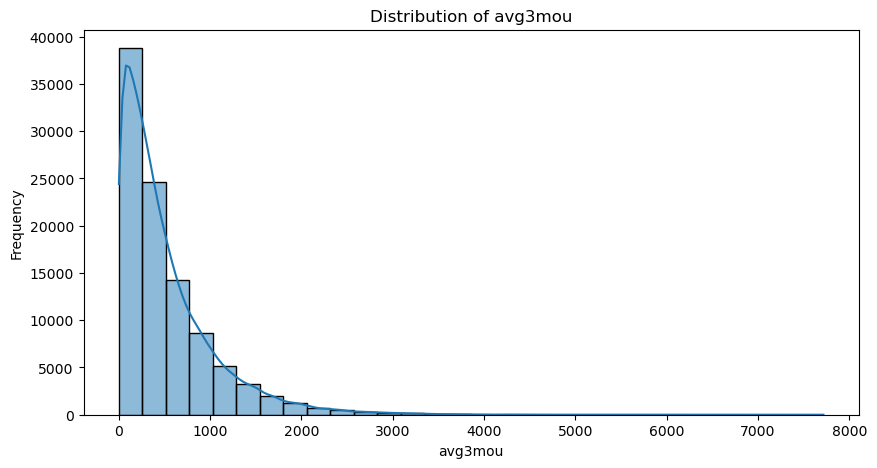

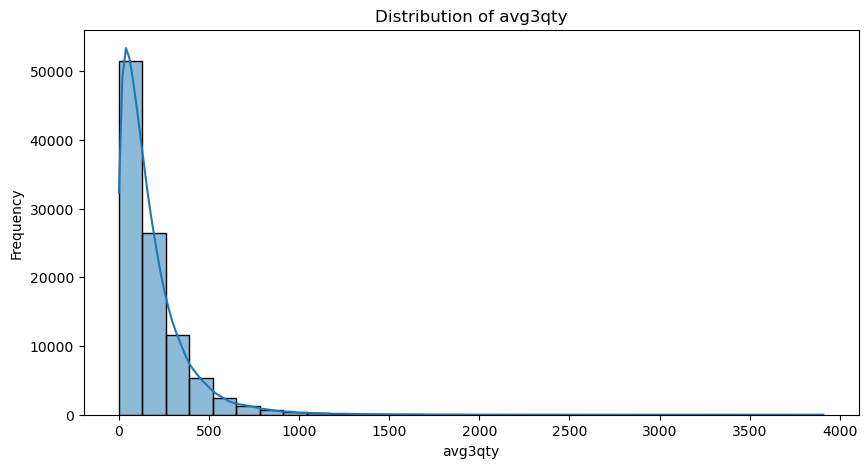

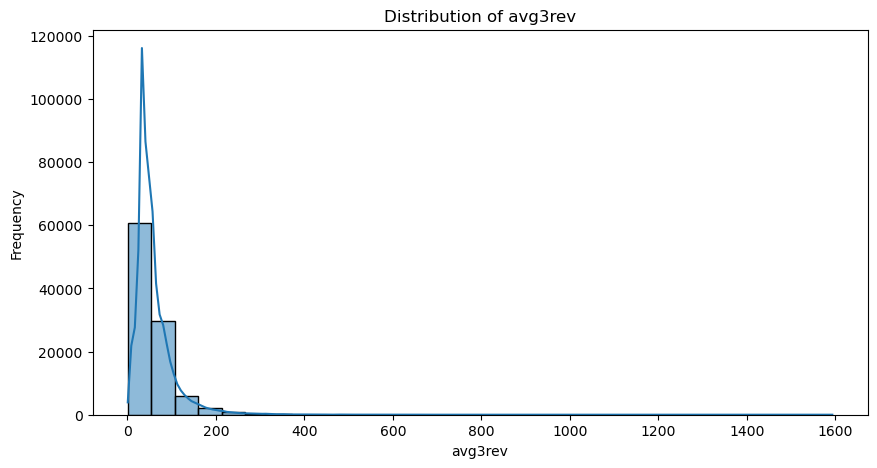

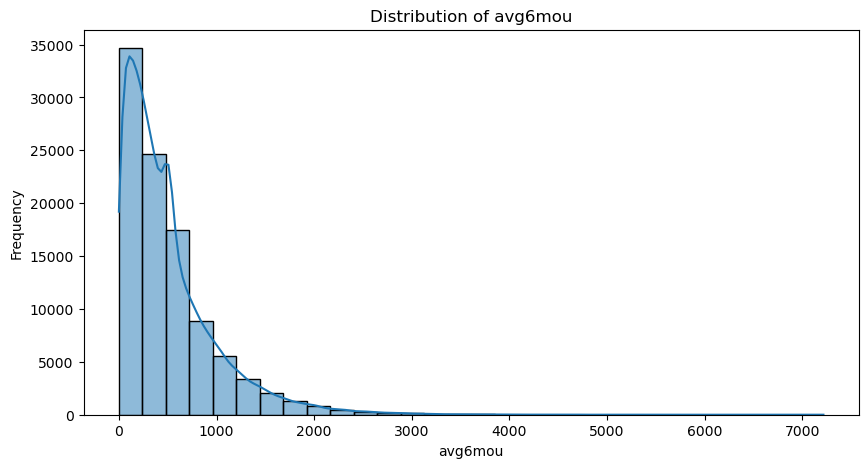

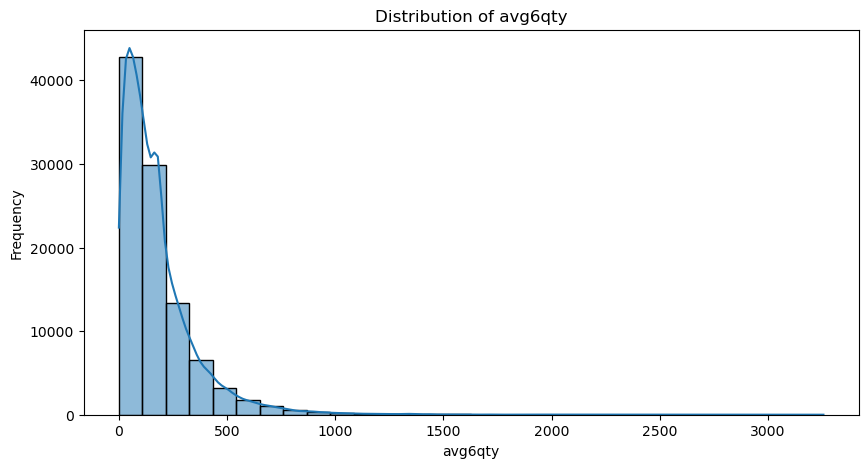

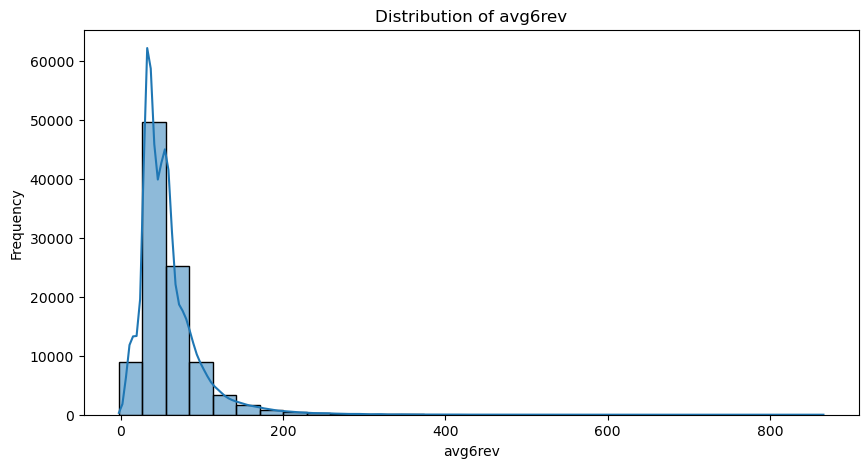

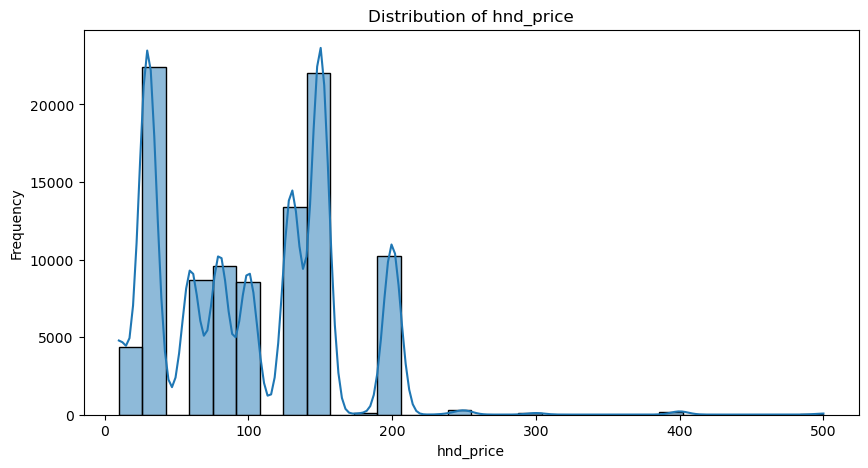

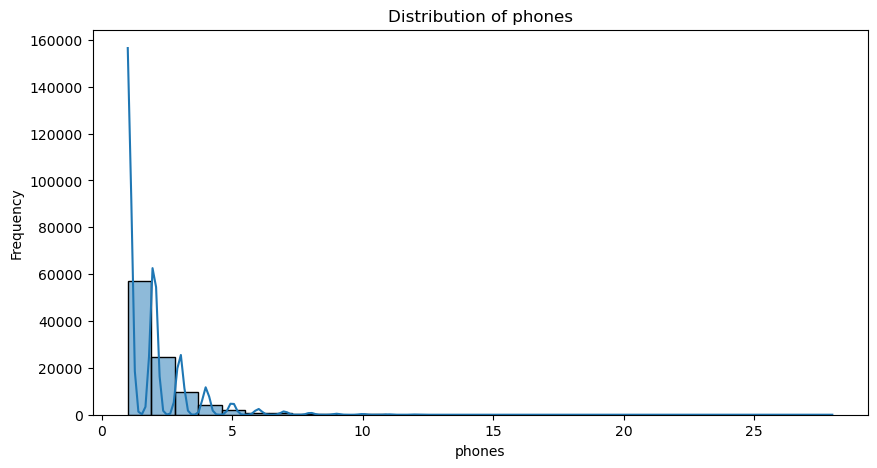

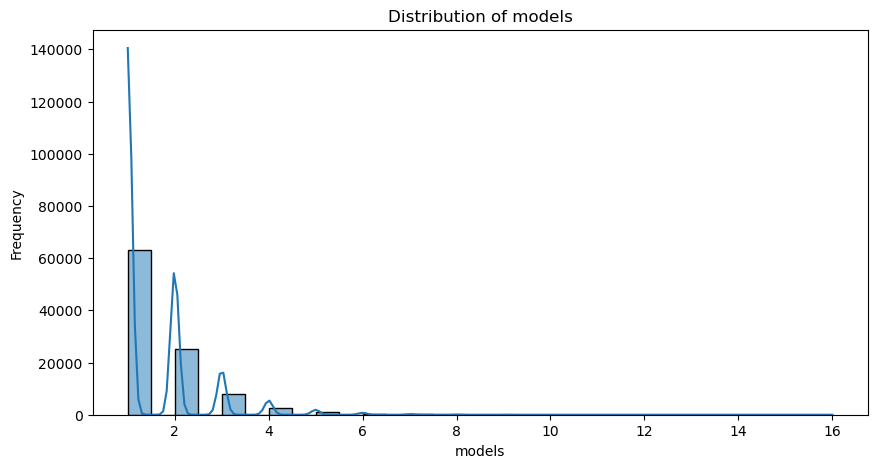

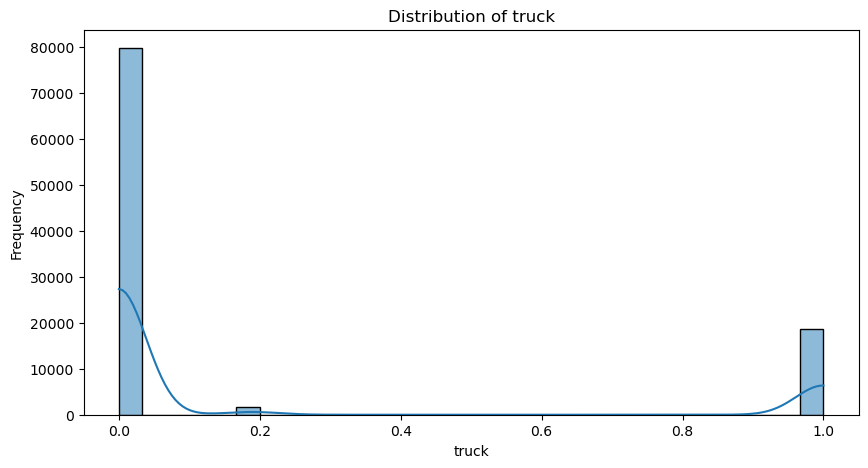

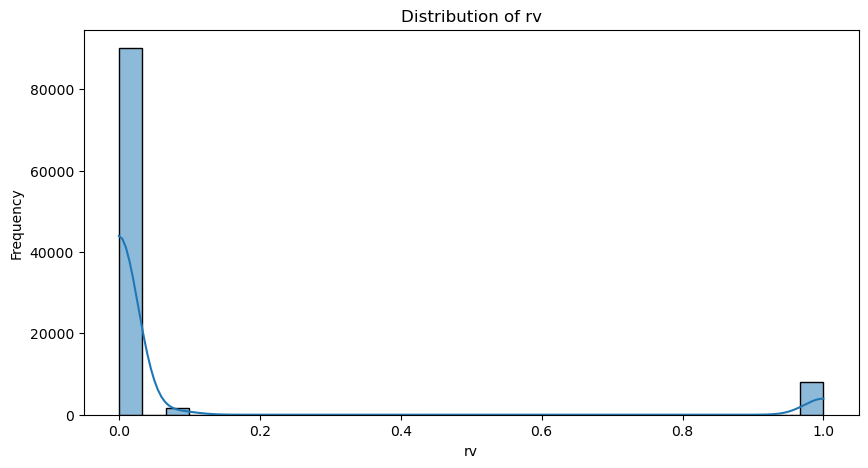

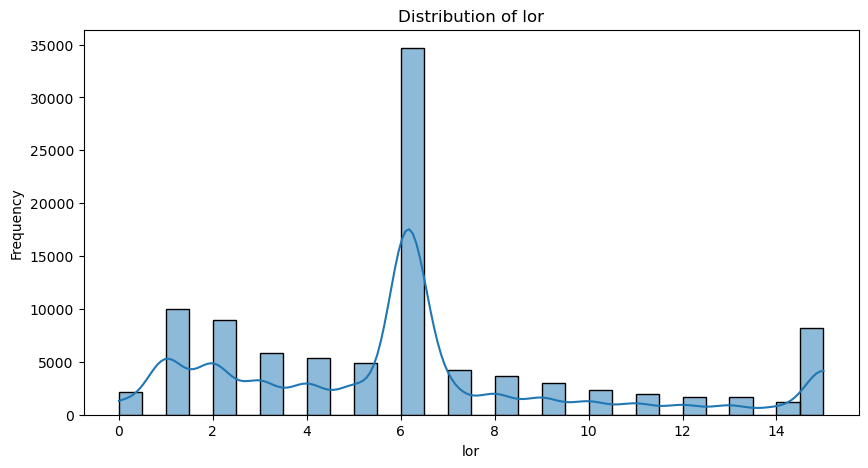

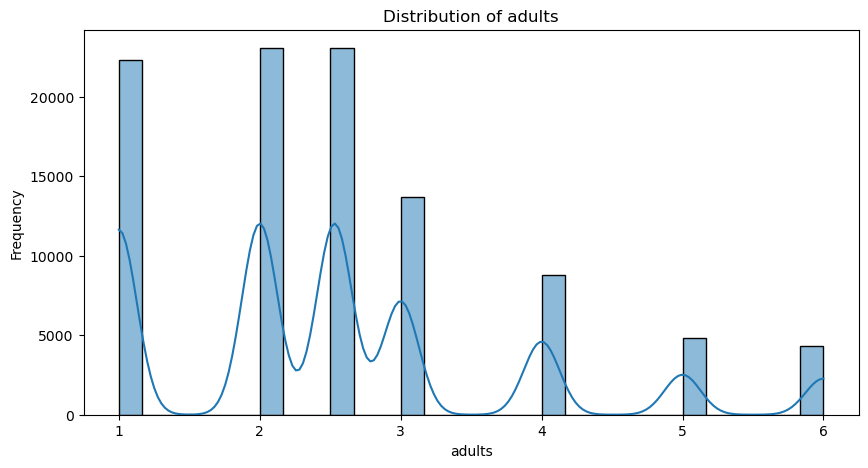

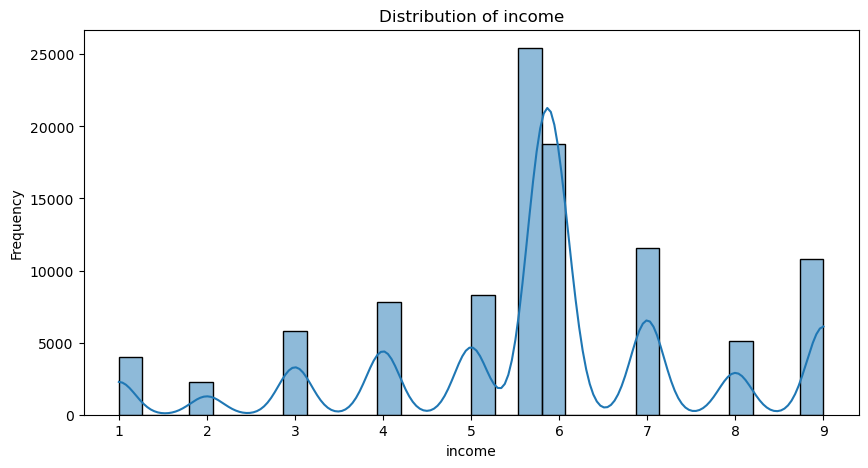

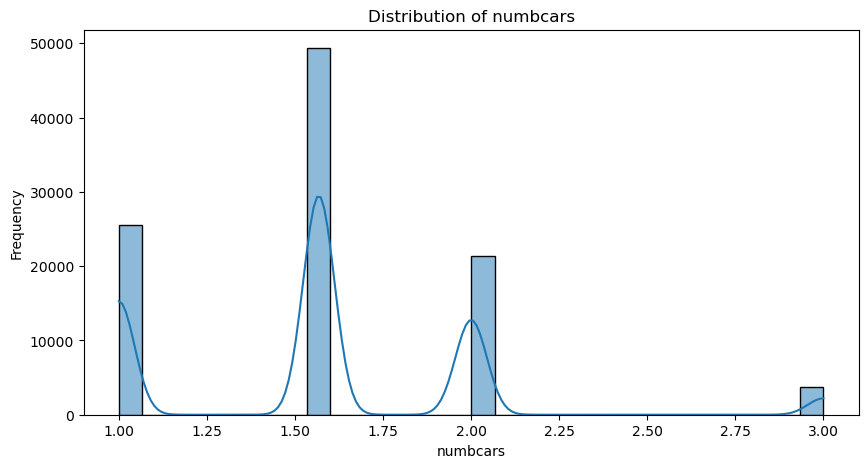

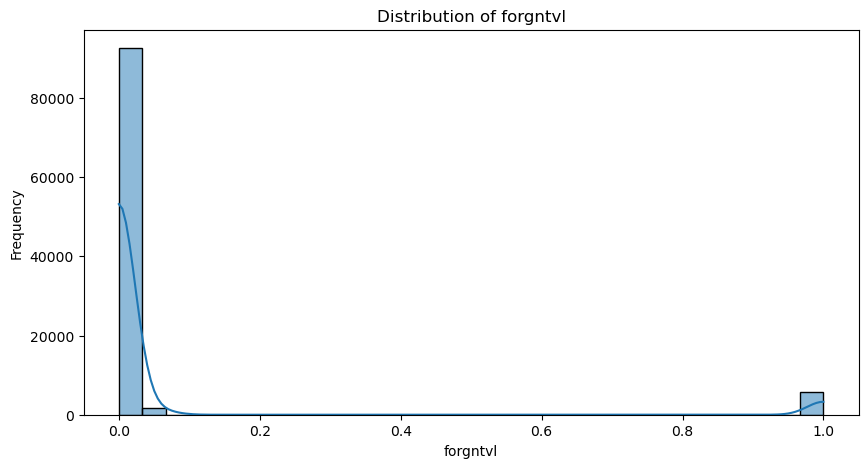

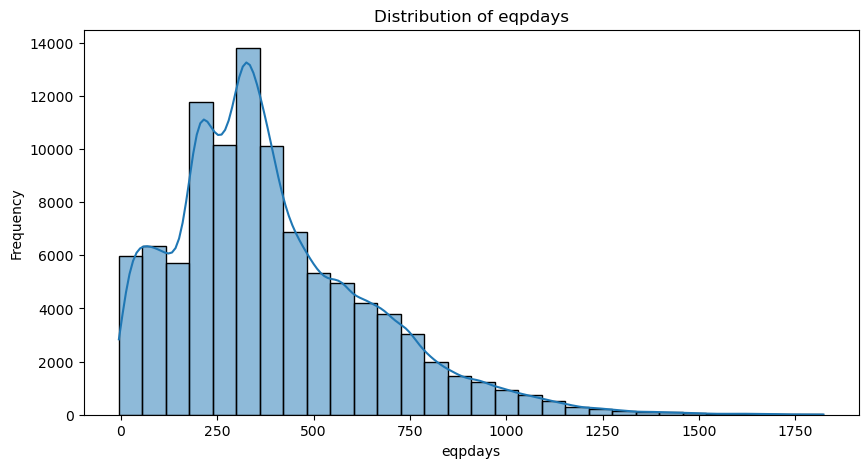

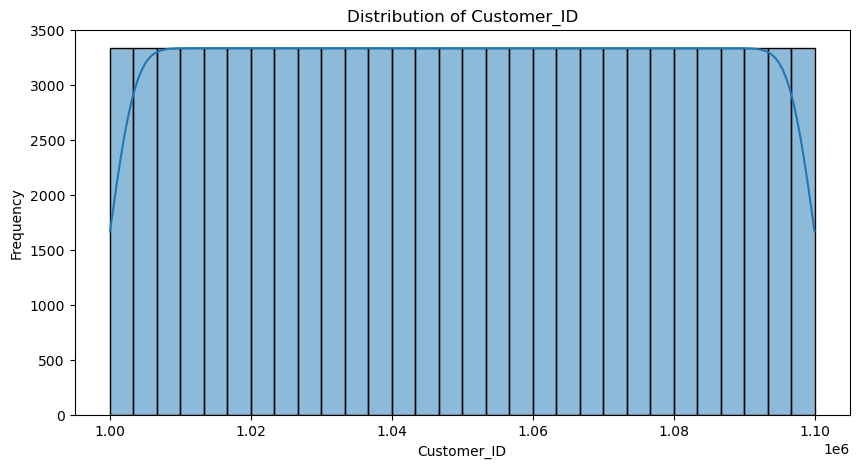

In [185]:
# Визуализация количественных признаков
for col in quantitative_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_quantitative[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Решила сделать отдельно матрицы для цифровых и категориальных значений

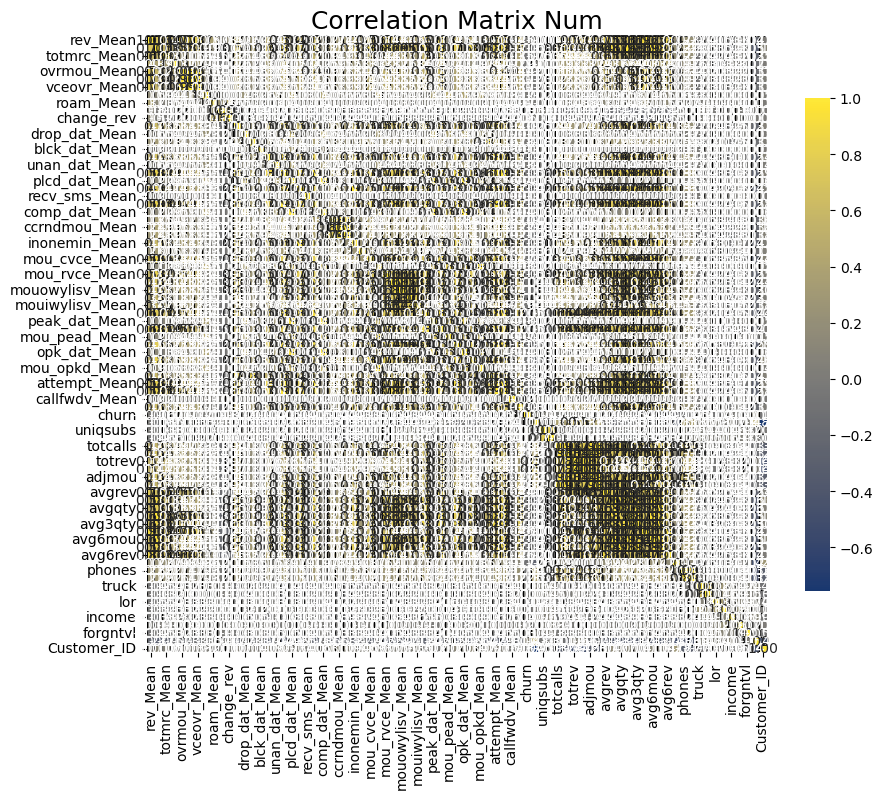

In [189]:
# Вычисляем корреляционную матрицу для цифровых данных
correlation_matrix_num = df_quantitative.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_num, annot=True, fmt=".2f", cmap='cividis', center=0,
            linewidths=.5, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Num', fontsize=18)
plt.show()

# # Выводим корреляцию с целевой переменной 
# target_correlation = correlation_matrix_['churn'].sort_values(ascending=False)
# print(target_correlation)

In [193]:
# Выводим корреляцию с целевой переменной 
target_correlation = correlation_matrix_num['churn'].sort_values(ascending=False)
print(target_correlation)

churn            1.000000
eqpdays          0.112691
uniqsubs         0.039882
vceovr_Mean      0.024197
ovrrev_Mean      0.023694
                   ...   
complete_Mean   -0.051740
mou_cvce_Mean   -0.052042
mou_Mean        -0.056925
totmrc_Mean     -0.068434
hnd_price       -0.102748
Name: churn, Length: 79, dtype: float64


In [195]:
# для наглядности решила вывести 15 наиболее сильных корреляций и в виде списка и виде графика
# Преобразуем матрицу в "длинный" формат
correlation_pairs = correlation_matrix_num.unstack()
# Убираем самокорреляции (где корреляция = 1)
correlation_pairs = correlation_pairs[correlation_pairs != 1]
# Сортируем по абсолютному значению корреляции и выбираем 15 наиболее значимых
top_correlations = correlation_pairs.abs().sort_values(ascending=False).head(15)

# Выводим результаты
print(top_correlations)


totcalls       adjqty           0.999798
adjqty         totcalls         0.999798
totmou         adjmou           0.999747
adjmou         totmou           0.999747
adjrev         totrev           0.998492
totrev         adjrev           0.998492
plcd_vce_Mean  attempt_Mean     0.998398
attempt_Mean   plcd_vce_Mean    0.998398
complete_Mean  comp_vce_Mean    0.997706
comp_vce_Mean  complete_Mean    0.997706
ovrrev_Mean    vceovr_Mean      0.994752
vceovr_Mean    ovrrev_Mean      0.994752
ccrndmou_Mean  cc_mou_Mean      0.988852
cc_mou_Mean    ccrndmou_Mean    0.988852
complete_Mean  attempt_Mean     0.985504
dtype: float64


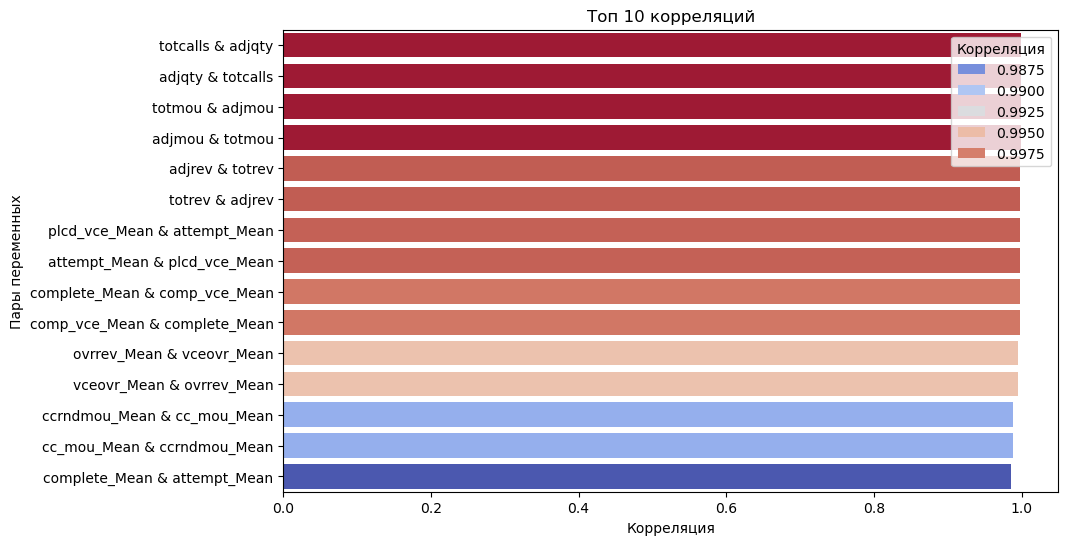

In [197]:
# Преобразуем индекс в DataFrame для удобства
top_correlations_df = top_correlations.reset_index()
top_correlations_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Создаем новый столбец для пар переменных
top_correlations_df['Variable Pair'] = top_correlations_df['Variable 1'] + ' & ' + top_correlations_df['Variable 2']

# Настраиваем размер графика
plt.figure(figsize=(10, 6))

# Создаем столбчатую диаграмму
sns.barplot(x='Correlation', y='Variable Pair', data=top_correlations_df, palette='coolwarm', hue='Correlation')

# Добавляем заголовок и метки
plt.title('Топ 10 корреляций')
plt.xlabel('Корреляция')
plt.ylabel('Пары переменных')

# Убираем легенду, если она не нужна
plt.legend(title='Корреляция', loc='upper right')

# Показываем график
plt.show()

In [226]:
# Попробовала использовать тест хи-квадрат и таблиц сопряженности (сontingency tables)

significant_columns = []

# Перебираем все категориальные столбцы
for col in categorical_cols:
    contingency_table = pd.crosstab(data['churn'], data[col])

    # Выполняем тест хи-квадрат
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Проверяем на значимость
    if p < 0.05:
        significant_columns.append(col)
        print(f"{col} - p-value: {p:.4f} (значимый)")

# Выводим список значимых столбцов
print("\nЗначимые столбцы:", significant_columns)

crclscod - p-value: 0.0000 (значимый)
asl_flag - p-value: 0.0000 (значимый)
prizm_social_one - p-value: 0.0000 (значимый)
area - p-value: 0.0000 (значимый)
dualband - p-value: 0.0000 (значимый)
refurb_new - p-value: 0.0000 (значимый)
hnd_webcap - p-value: 0.0000 (значимый)
ownrent - p-value: 0.0330 (значимый)
marital - p-value: 0.0000 (значимый)
infobase - p-value: 0.0000 (значимый)
HHstatin - p-value: 0.0021 (значимый)
ethnic - p-value: 0.0000 (значимый)
kid0_2 - p-value: 0.0022 (значимый)
creditcd - p-value: 0.0000 (значимый)

Значимые столбцы: ['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'marital', 'infobase', 'HHstatin', 'ethnic', 'kid0_2', 'creditcd']


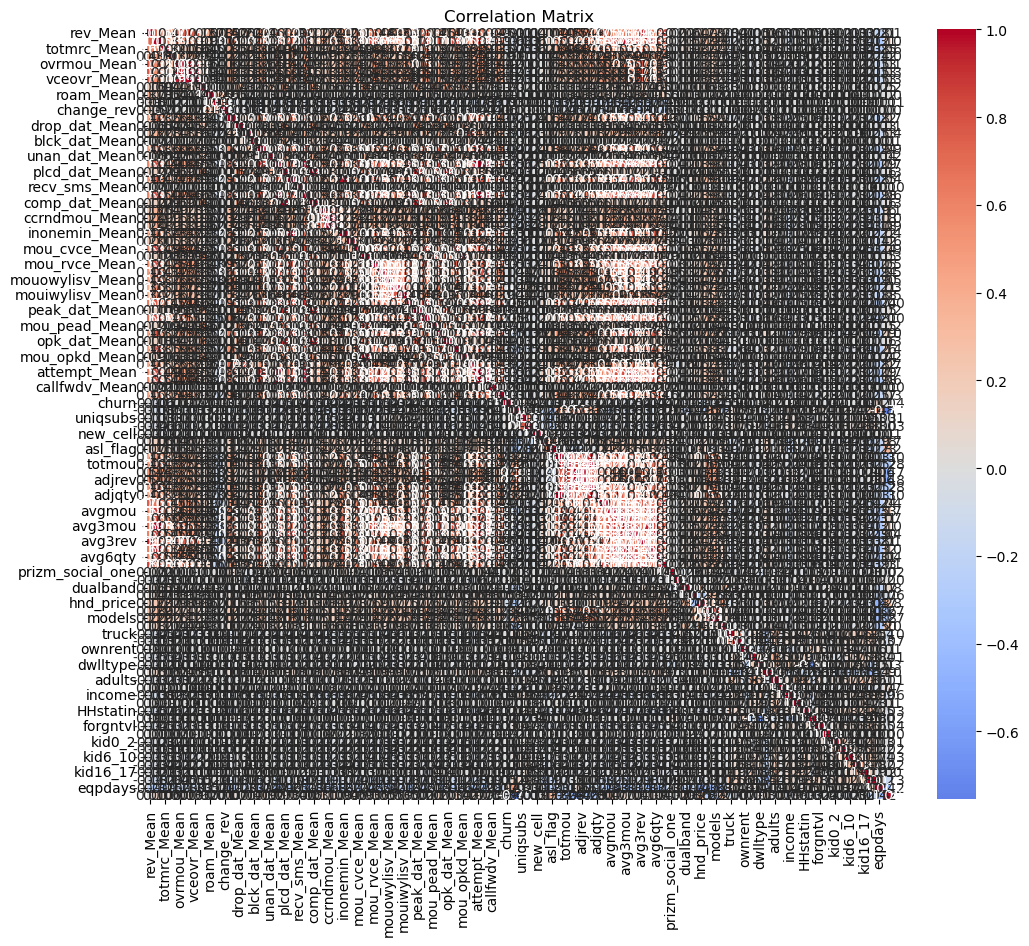

In [230]:
# Создаем экземпляр LabelEncoder
le = LabelEncoder()

# В этом цикле LabelEncoder применяется ко всем категориальным столбцам, преобразуя их в числовые значения
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
correlation_matrix_cat = data.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cat, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# опять таки захотелось вывести 10-15 наиболее значимых корреляций

In [232]:
data[categorical_cols] = data[categorical_cols].apply(le.fit_transform)

In [238]:
# Рассчитываем корреляционную матрицу
correlation_matrix_top = data.corr()
# Получаем верхний треугольник матрицы корреляций
upper_triangle = correlation_matrix_top.where(np.triu(np.ones(correlation_matrix_top.shape), k=1).astype(bool))


adjqty         totcalls         0.999798
adjmou         totmou           0.999747
adjrev         totrev           0.998492
attempt_Mean   plcd_vce_Mean    0.998398
complete_Mean  comp_vce_Mean    0.997706
vceovr_Mean    ovrrev_Mean      0.994752
cc_mou_Mean    ccrndmou_Mean    0.988852
complete_Mean  attempt_Mean     0.985504
comp_vce_Mean  plcd_vce_Mean    0.985459
attempt_Mean   comp_vce_Mean    0.983922
complete_Mean  plcd_vce_Mean    0.983280
comp_dat_Mean  plcd_dat_Mean    0.981303
avg3mou        mou_Mean         0.979385
inonemin_Mean  recv_vce_Mean    0.966703
mou_opkd_Mean  mou_cdat_Mean    0.958300
dtype: float64


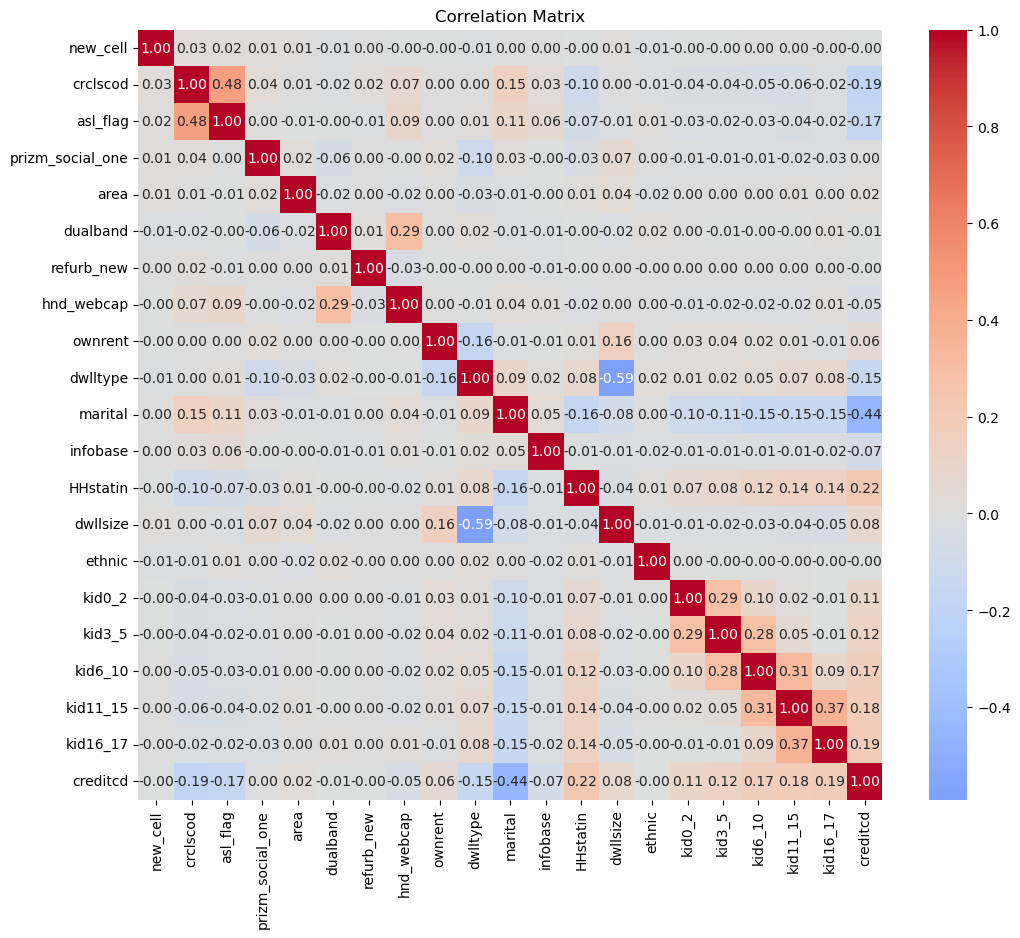

In [240]:
# Находим 10-15 наиболее значимых корреляций
top_correlations = upper_triangle.unstack().sort_values(ascending=False).head(15)

# Выводим наиболее значимые корреляции
print(top_correlations)

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [286]:
# Методы отбора на основе важности признаков
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [288]:
X = data.drop(columns=['churn'])
y = data['churn']

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [292]:
# Обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [143]:
# Получение важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


In [145]:
# Создание DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

# Выводим важность признаков в порядке убывания
print(feature_importance_df)

          Feature  Importance
0         eqpdays    0.032456
1      change_mou    0.024970
2          months    0.023791
3     Customer_ID    0.023294
4      change_rev    0.020262
..            ...         ...
94  unan_dat_Mean    0.000815
95  drop_dat_Mean    0.000592
96  recv_sms_Mean    0.000356
97  blck_dat_Mean    0.000323
98  callfwdv_Mean    0.000161

[99 rows x 2 columns]


In [147]:
# Выводим первые 10 важных признаков в порядке убывания
top_10_features = feature_importance_df.head(10)
print(top_10_features)

       Feature  Importance
0      eqpdays    0.032456
1   change_mou    0.024970
2       months    0.023791
3  Customer_ID    0.023294
4   change_rev    0.020262
5     mou_Mean    0.019973
6       adjrev    0.019332
7       avgrev    0.019198
8       totrev    0.019086
9       avgqty    0.019059


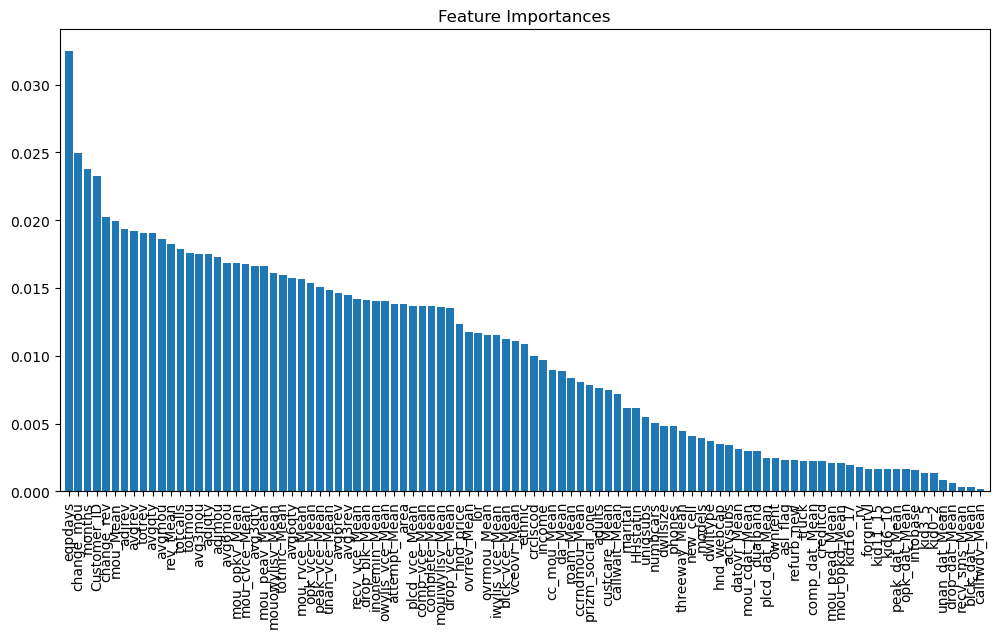

In [149]:
# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [300]:
# Еще попробовала метод Lasso (L1-регуляризация)может быть эффективным в отборе признаков
# с использованием ElasticNet
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# целевая переменная
X = data.drop('churn', axis=1)
y = data['churn']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание пайплайна с масштабированием и ElasticNet
model = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, max_iter=10000))
model.fit(X_train, y_train)

# Получение коэффициентов
coef = model.named_steps['elasticnet'].coef_  # Извлекаем коэффициенты из модели
features = X.columns  # Имена признаков

# Создание DataFrame для важности признаков
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})

# Фильтрация ненулевых коэффициентов
top_features = feature_importance_df[feature_importance_df['Coefficient'] != 0].copy()  # Используем copy()

# С использованием .loc для добавления нового столбца
top_features.loc[:, 'Absolute Coefficient'] = top_features['Coefficient'].abs()
top_features = top_features.sort_values(by='Absolute Coefficient', ascending=False)

# Выводим 10 самых важных признаков
print(top_features.head(10))

        Feature  Coefficient  Absolute Coefficient
97      eqpdays     0.046945              0.046945
61       avgmou     0.028163              0.028163
1      mou_Mean    -0.023212              0.023212
53     asl_flag    -0.023067              0.023067
73    hnd_price    -0.021061              0.021061
80          lor    -0.015482              0.015482
48       months    -0.014410              0.014410
5   ovrrev_Mean     0.014133              0.014133
9    change_mou    -0.013835              0.013835
2   totmrc_Mean    -0.013355              0.013355


In [ ]:
""" Таким образом, чтобы предказать уход клиента из телекоммуникационной компании надо в первую очередь учитывать:
eqpdays - Количество дней, прошедших с момента последней активности, что логично,  (однако, меня в этом признаке смущает
приставка eqp..day,  все таки так логично было бы сократить количество дней, в течение которых клиент использует какое-то 
оборудование (equipment))
change_mou - изменение объема использования минут на общение (minut of use). Это говорит об существенном изменении привычки
общения, что может является сигналом недовольства
months - чем больше количество месяцев, в течение которых клиент пользуется услугами, тем менее он склонен к уходу
change_rev - снижение дохода указывает на уменьшение интереса к услугам
mou_Mean - чем выше среднее количество минут, которые клиент использует, тем больше удовлетворенность клиента и меньше риск ухода
totrev - общий доход от клиента за все время. Это важный показатель удовлетворенности клиента 
avgmou - среднее количество минут на общение. чем больше, тем меньше риск ухода
и тд
мы видим, что изменение в использовании является важным фактором""" 